# 1. Basic workflow


This vignette shows the basic workflow of Via and how to access the different visualizations after running the computations. The dataset is a toy multifurcation.
We start by importing modules. 

In [1]:
from pyVIA.core import *
import pyVIA.datasets_via as datasets_via
import pandas as pd 
import umap 
import scanpy as sc


/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-pac

/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/phate/__init__.py


/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


First load all the data. Below we use UMAP to create a 2D embedding which is later used for visualization. Umap can be substituted with tsne/phate/PCA etc. VIA can also automatically compute an embedding ('via-mds' or 'via-umap') which is optionally generated when running VIA. 


In [2]:
adata_counts = datasets_via.toy_multifurcating()
print(adata_counts)
true_label = adata_counts.obs['group_id'].tolist()
ncomps = 30
sc.tl.pca(adata_counts, svd_solver='arpack', n_comps=ncomps)

embedding = umap.UMAP().fit_transform(adata_counts.obsm['X_pca'][:, 0:10])

/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pyVIA/datasets_via.py:41: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_counts = df_counts.drop('Unnamed: 0', 1)
/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'group_id', 'true_time'


### Expected Outputs
1. Cluster graph level trajectory highlighting cell type composition, pseudotime and start/end states 
2. Trajectory drawn onto UMAP embedding.
3. Lineage pathways depicting lineage probabilities towards each of the detected terminal states
4. Gene trends for each lineage for marker genes
5. Vector fields for fine-grained trajectory
6. Cluster graph trajectory colored by gene expression level

### Parameters
- `knn` number of nearest neighbors for the KNN-graph 
- `true_label`: list of annotations length nsamples. if these are unavailable then leave as default None
- `clustergraph_pruning`: typically 0-3, the number of standard deviations for clustergraph pruning. level of pruning applied to the clustergraph carried forward for pseudotime and lineage probability calculations. Larger means less pruning  
- `jac_std_global`: Controls granularity of clustering. range 0-1 is reasonable. values closer to 0 will result in more and smaller clusters  
- `too_big_factor`: default 0.3. Clusters that are bigger than 30% of the entire cell population will be re-clustered. Values 0.1-0.3 work well
- `preserve_disconnected`: default = True. Attempts to reconnect fragmentation incurred by pruning. if you suspect disconnected trajectories, set this to False
- `dataset` = `('' or 'group')` and is set based on the type of `root_user` parameter provided : `'group'` works for any dataset where the root is provided as a group ID in the true_label. e.g. if root_user = ['HSC'], then the root will be selected as a cluster which has root like properties and is largely made up of 'HSC' cells. `''` is suitable when `'root_user'` is a single-cell index or None
- `root_user`: default None. Can be provided at the group or single-cell index level. e.g. ['GroupX'] corresponding to a cell type in true_label or [1326] corresponding to a single cell index. If left as None, then in the case where velocity_matrix is available then a shortlist of 3 roots will be suggested. When root_user is None and velocity_matrix is None, then a root is chosen at random
- `edgebundle_pruning_twice`: default = False. When True, can sometimes further simplify the visualization if the edges are too numerous/cluttered. it does not impact the pseudotime and lineage computations




In [3]:
#define parameters
ncomps, knn, random_seed, dataset, root_user  =30,20, 42,'toy', ['M1']

v0 = VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, jac_std_global=0.15, dist_std_local=1,
             knn=knn, cluster_graph_pruning_std=1, too_big_factor=0.3, root_user=root_user, preserve_disconnected=True, dataset='group',
             random_seed=random_seed)#, piegraph_arrow_head_width=0.2,             piegraph_edgeweight_scalingfactor=1.0)  
v0.run_VIA()


2023-09-14 16:39:08.862234	Running VIA over input data of 1000 (samples) x 30 (features)
2023-09-14 16:39:08.862426	Knngraph has 20 neighbors
2023-09-14 16:39:09.316608	Finished global pruning of 20-knn graph used for clustering at level of 0.15. Kept 46.7 % of edges. 
2023-09-14 16:39:09.327429	Number of connected components used for clustergraph  is 1
2023-09-14 16:39:09.385390	Commencing community detection
2023-09-14 16:39:09.402158	Finished running Leiden algorithm. Found 43 clusters.
2023-09-14 16:39:09.403488	Merging 30 very small clusters (<10)
2023-09-14 16:39:09.404738	Finished detecting communities. Found 13 communities
2023-09-14 16:39:09.405032	Making cluster graph. Global cluster graph pruning level: 1
2023-09-14 16:39:09.410168	Graph has 1 connected components before pruning
2023-09-14 16:39:09.412759	Graph has 1 connected components after pruning
2023-09-14 16:39:09.413068	Graph has 1 connected components after reconnecting
2023-09-14 16:39:09.414046	0.0% links trimmed 

### VIA graph

To visualize the results of the Trajectory inference in various ways. Via offers various plotting functions.We first show the cluster-graph level trajectory abstraction consisting of two subplots colored by annotated (true_label) composition and by pseudotime

/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/pyVIA/plotting_via.py:2854: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sct = ax.scatter(node_pos[:, 0], node_pos[:, 1],


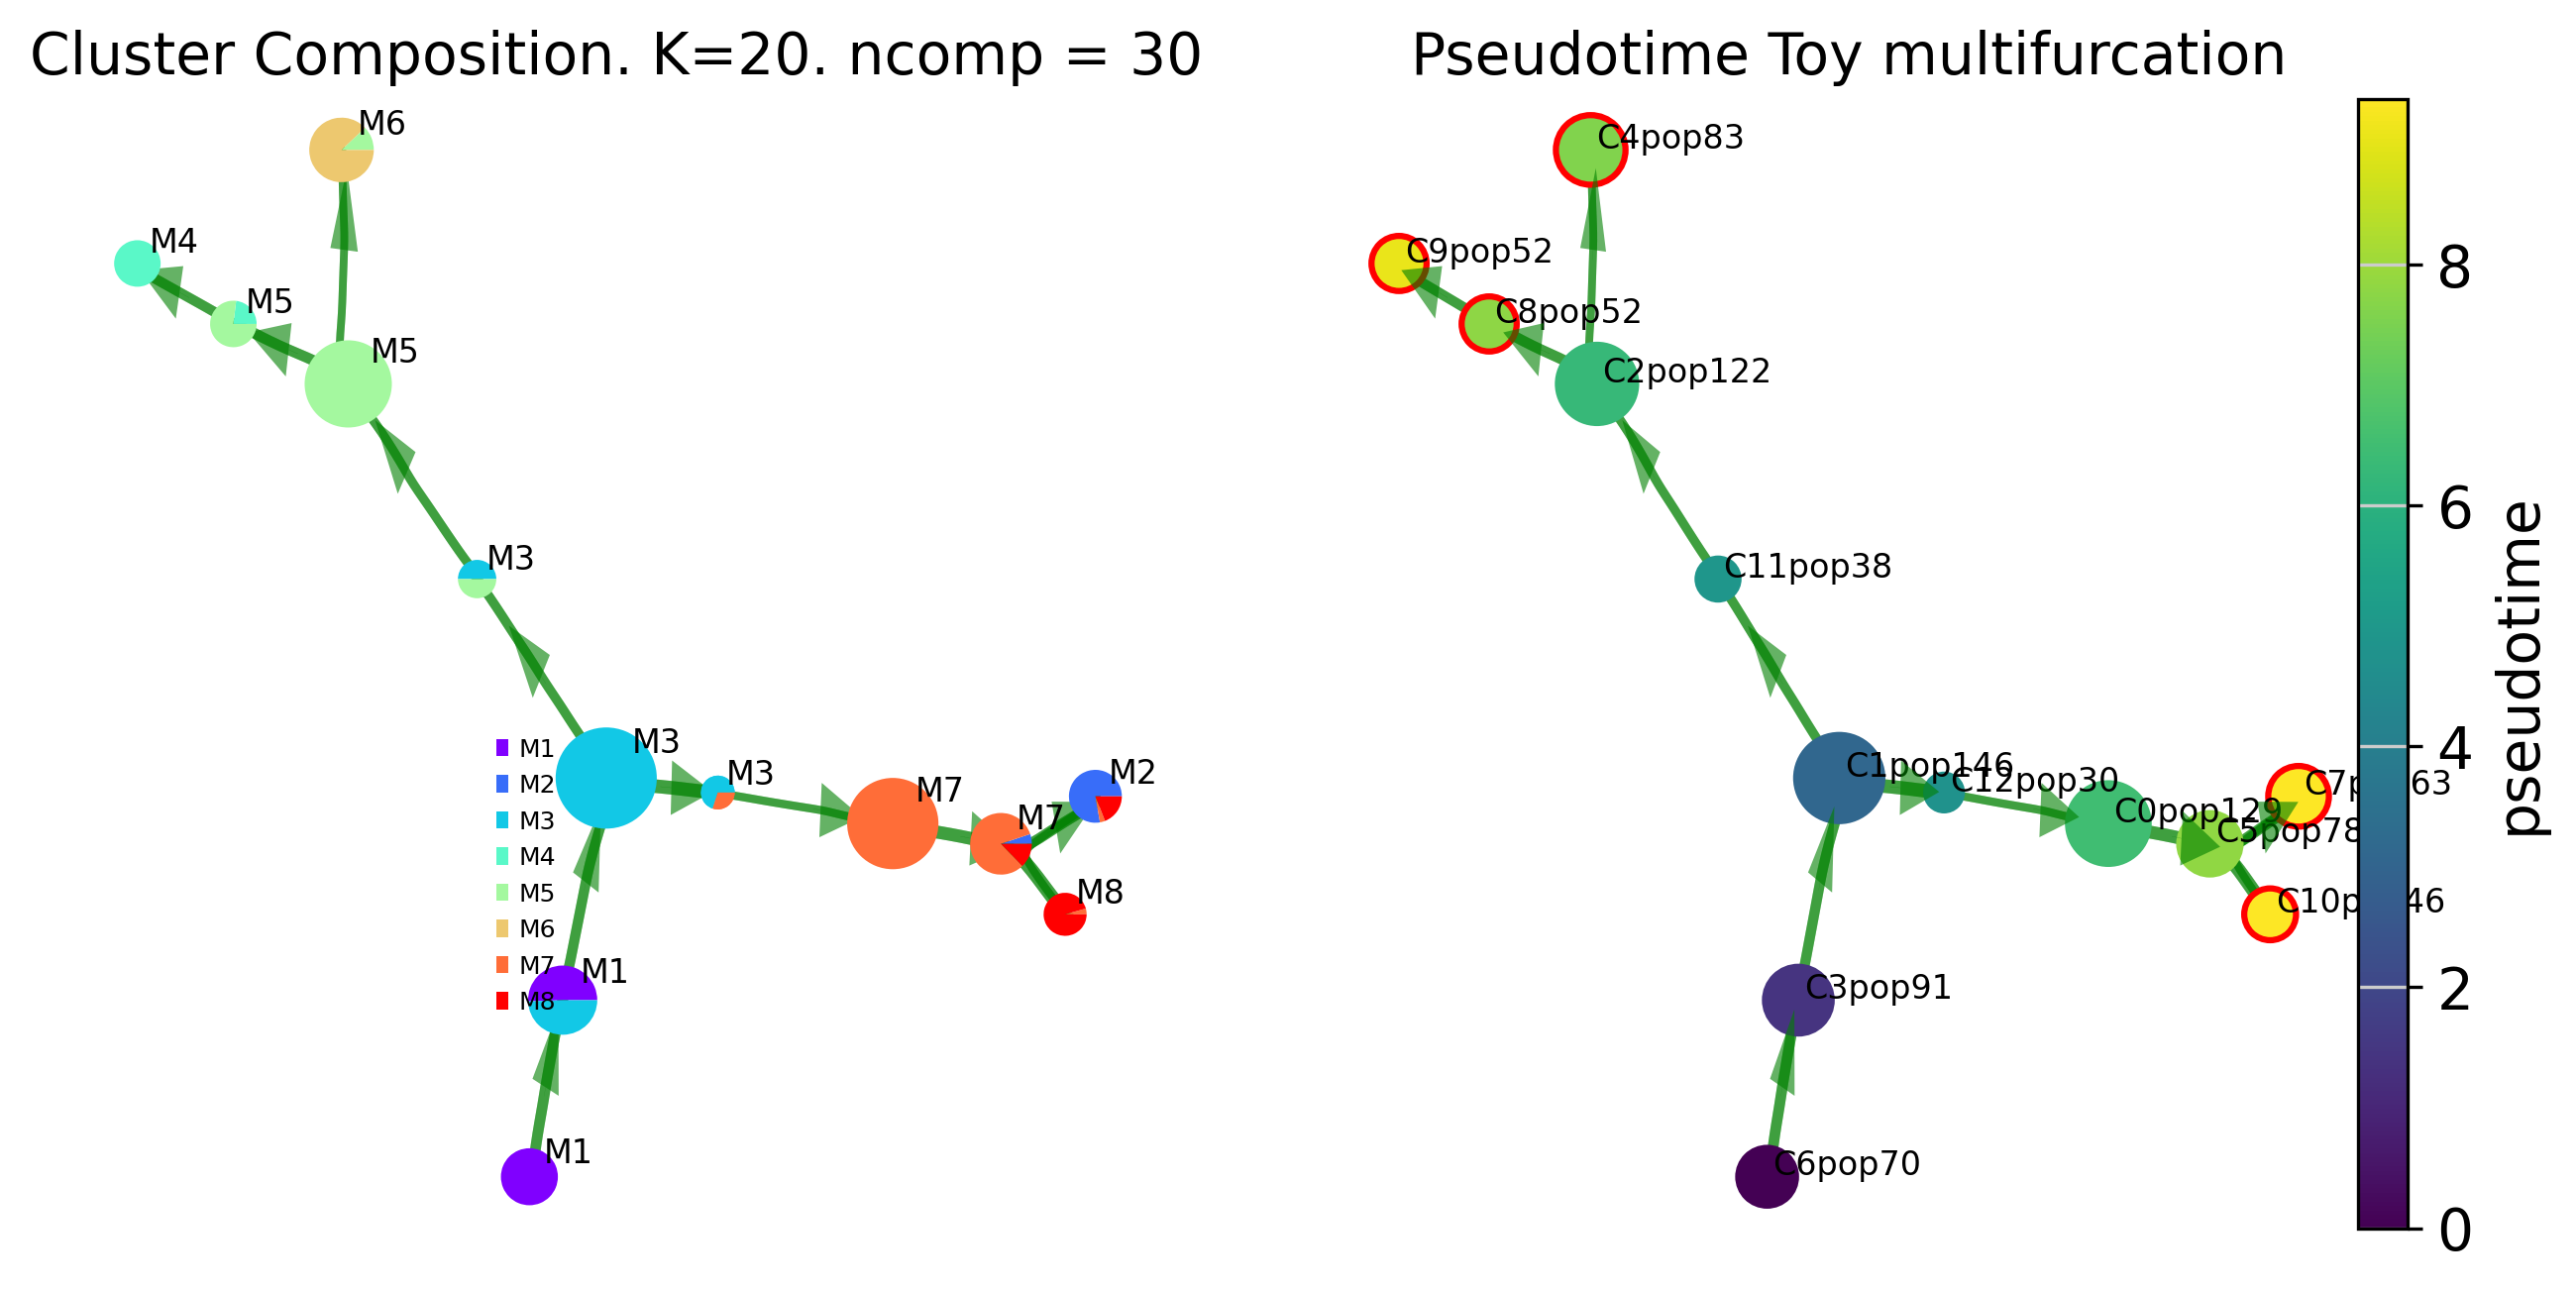

In [4]:
# draw the piechart clustergraph beside a clustergraph colored by the pseudotime ('pt') or gene expression ('gene').
# type_pt: 'pt' automatically takes the cluster level pseudotimes. 'gene' requires user to also pass gene_exp 
# gene_exp =''. In order to plot gene intensity, a list of cluster level gene/feature values should be provided as a list
# cmap = None. Can be specified and influences the cmap of the pt/gene graph
# ax_text = True. Can set to false if you don't want the cluster and populations labels 
# other features like edge width, color, alpha can be set here too
# Terminal lineage clusters have red outline (in rhs graph)
fig, ax, ax2= draw_piechart_graph(via_object=v0, type_data='pt', title='Toy multifurcation', cmap='viridis', ax_text=True, gene_exp='', alpha_edge=0.5, linewidth_edge=1.5, edge_color='green', headwidth_arrow=0.2)
fig.set_size_inches(10,5)

## Scatter Plots
#### colored by true_label

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


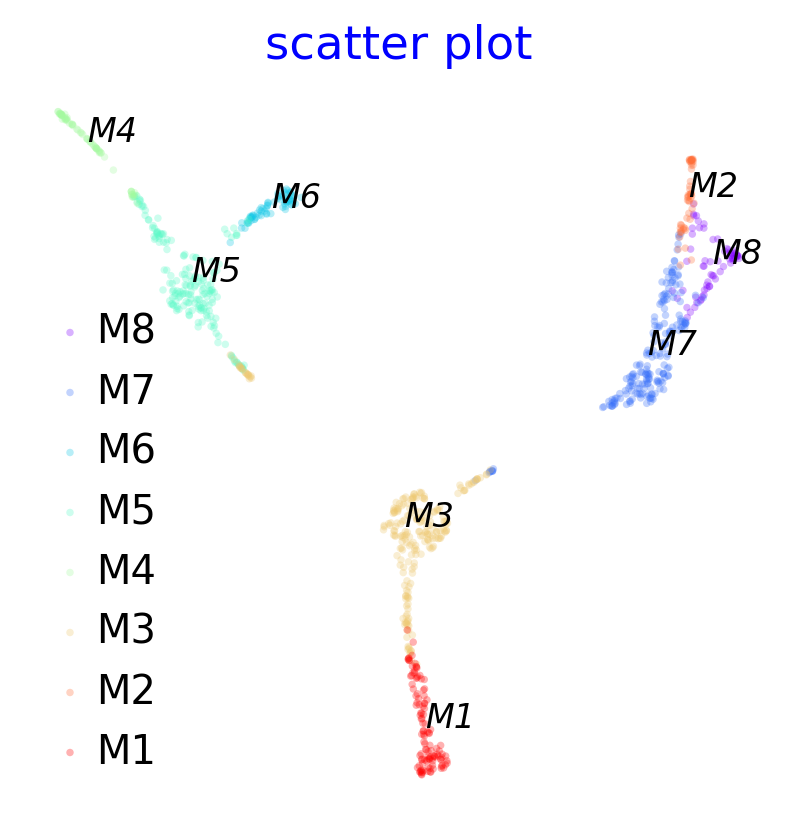

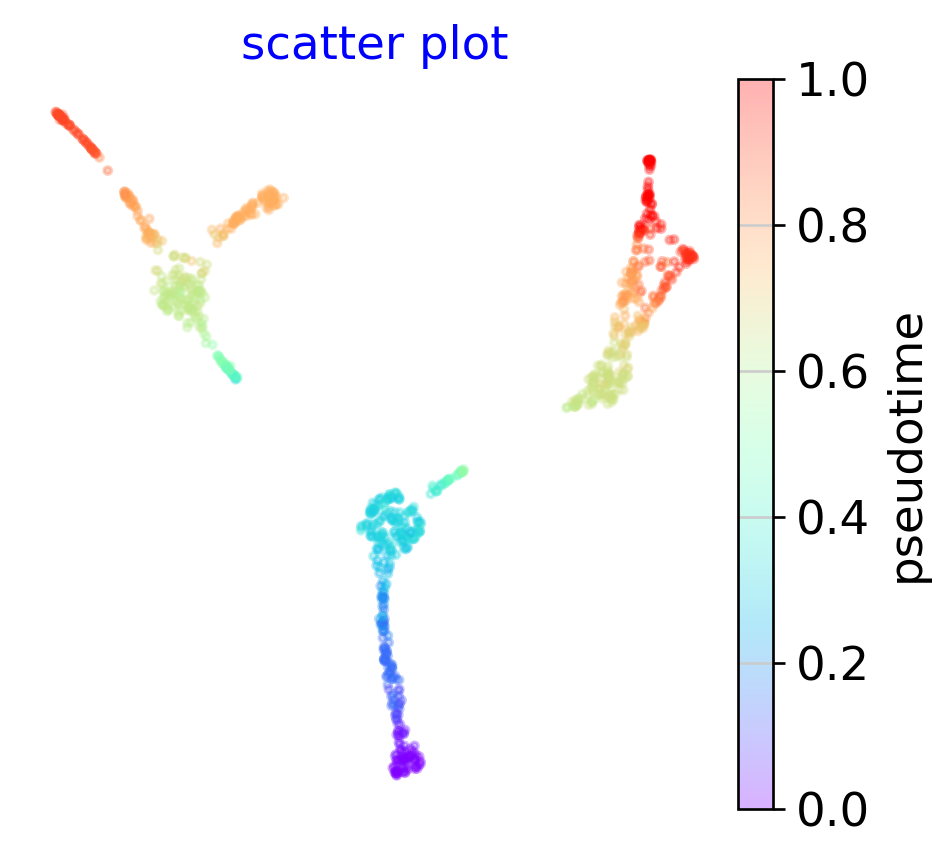

In [5]:
f, ax = plot_scatter(embedding = embedding, labels = v0.true_label)
f, ax = plot_scatter(embedding = embedding, labels = v0.single_cell_pt_markov)

## Fast visualization using underlying single-cell VIA-graphs

- VIA offers two embedding options generated together with the trajectory by combining the underlying trajectory graph with different manifold projections:
    - via-mds
    - via-umap

- For automated computation (probably easiest): simply initialize VIA with parameters `do_compute_embedding = True`, and `embedding_type = 'via-mds' or 'via-umap'`.  

For more control after running VIA, simply call the `via_mds()` function. When using time-series data consider using via-mds and via-umap automatically for improved visualizations that are well integrated with the Trajectory.
### VIA-mds Parameters
- `n_milestones` (default 2000) larger number takes longer time and more RAM
- `double_diffusion` (default False) setting True can sharpen the "strokes"
- `t_diffusion` (default 1) higher values can incur more smoothing
- `time_series_labels` (list of numeric values, length n_samples representing some kind of sequential/temporal information, such as sampling times). 

2023-09-14 16:39:46.445289	Commencing Via-MDS
2023-09-14 16:39:46.445727	Resetting n_milestones to 1000 as n_samples > original n_milestones
2023-09-14 16:39:46.929482	Start computing with diffusion power:1
2023-09-14 16:39:46.951578	Starting MDS on milestone
2023-09-14 16:39:48.524709	End computing mds with diffusion power:1
2023-09-14 16:39:48.842010	Commencing Via-MDS
2023-09-14 16:39:48.842088	Resetting n_milestones to 1000 as n_samples > original n_milestones
2023-09-14 16:39:49.339360	Start computing with diffusion power:1
2023-09-14 16:39:49.354397	Starting MDS on milestone
2023-09-14 16:39:50.940838	End computing mds with diffusion power:1


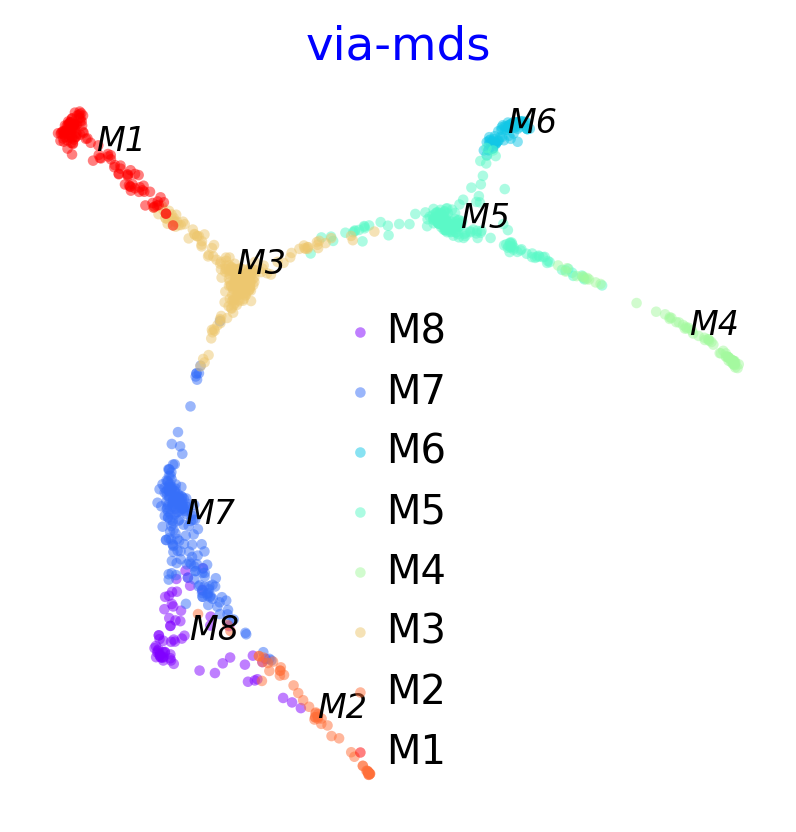

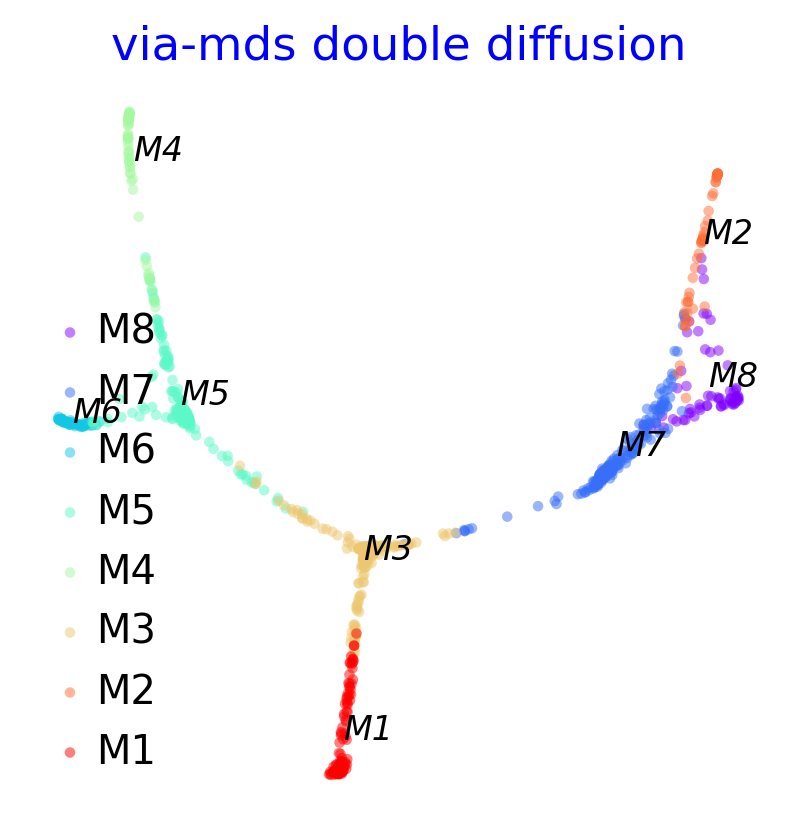

In [6]:
via_mds_embedding1 = via_mds(via_object=v0)
f, ax = plot_scatter(embedding=via_mds_embedding1, labels=v0.true_label, s=10, alpha=0.5, title='via-mds')

via_mds_embedding2 = via_mds(via_object=v0, double_diffusion = True)
f, ax = plot_scatter(embedding=via_mds_embedding2, labels=v0.true_label, s=10, alpha=0.5,title='via-mds double diffusion')

## VIA-umap based on underlying via single cell knn graphs

This is encouraged especially when VIA is run with timeseries data `time_series_labels = [list of numeric values]`

X-input (1000, 30)
n cell 1000
2023-09-14 16:40:00.344470	Computing umap on sc-Viagraph


/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/umap/spectral.py:324: RuntimeWarning: divide by zero encountered in divide
  1.0 / np.sqrt(diag_data), 0, graph.shape[0], graph.shape[0]


  0%|          | 0/100 [00:00<?, ?it/s]

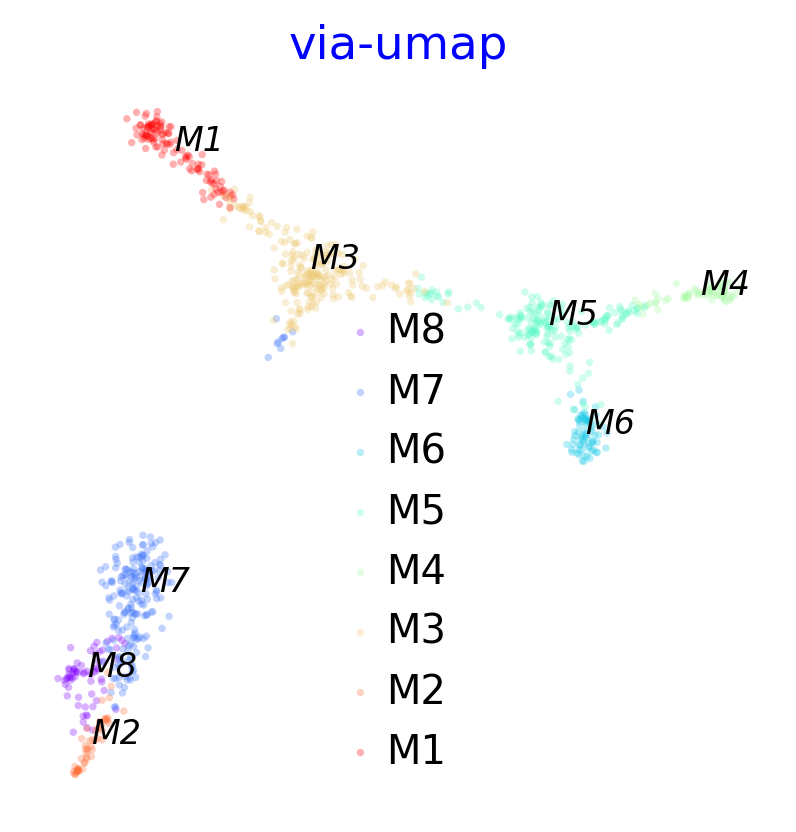

In [7]:
via_umap1 = via_umap(via_object=v0,min_dist=0.2, random_state=0)
f, ax = plot_scatter(embedding=via_umap1, labels=v0.true_label, title='via-umap')

### Vector field
The vector field of trajectories is projected onto the embedding 

/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


(<Figure size 1200x1200 with 1 Axes>, <Axes: title={'center': 'Streamplot'}>)

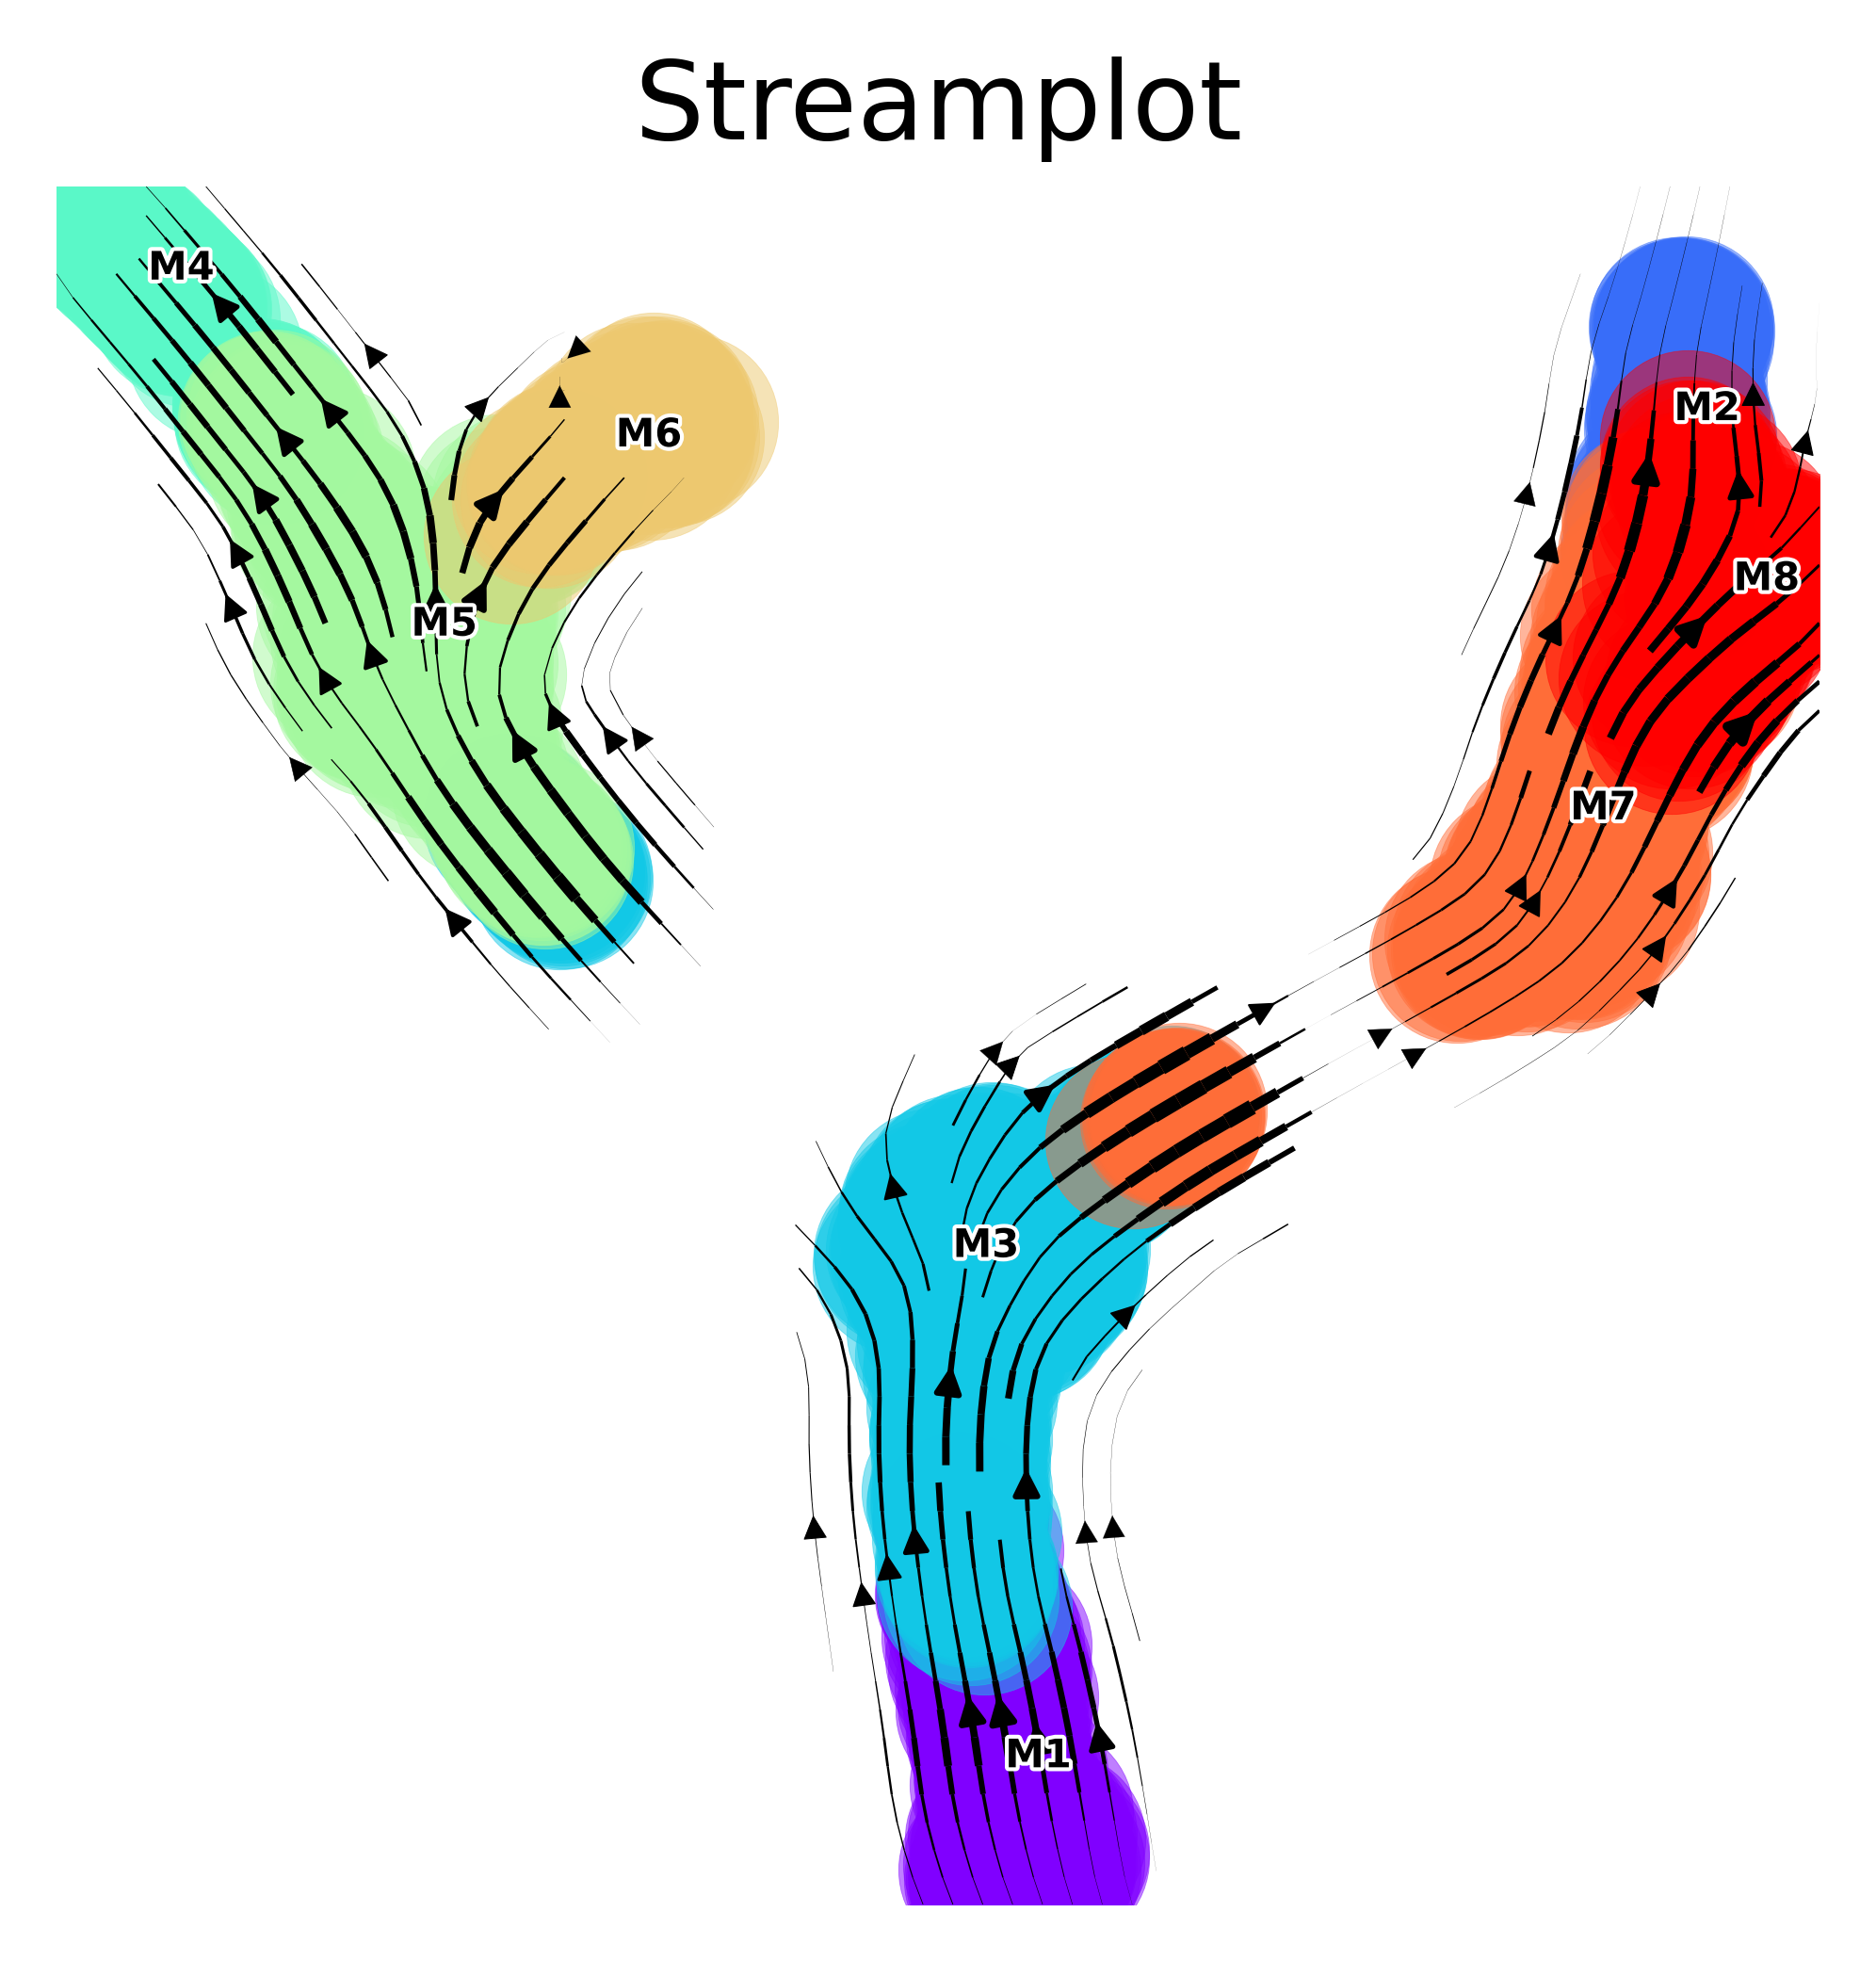

In [8]:
#default parameters:
# scatter_size=500
# scatter_alpha=0.5
# marker_edgewidth=0.1, outline of scatter points
# density_stream = 2, spacing between field lines
# smooth_transition=1,smoothing of transition matrix over neighbors of neighbors
# color_scheme = 'annotation', corresponds to true_labels  (cell types) provided. Can also be set to 'cluster' and 'time' and 'other'
# add_outline_clusters=False
# other_labels = [] provide a list of values for each cell corresponding to the value / annotation you wish to plot

via_streamplot(v0, embedding)

2022-08-24 20:32:55.315504	Inside animated. File will be saved to location /home/shobi/Trajectory/Datasets/Toy3/test_toy3.gif
total number of stream lines 2329


  0%|          | 0/27 [00:00<?, ?it/s]


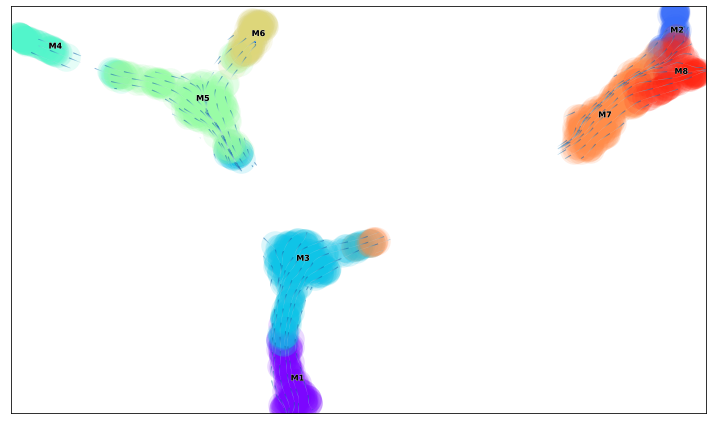

In [10]:
animated_streamplot(v0, embedding, scatter_size=800, scatter_alpha=0.15, density_grid=2,  saveto='/home/shobi/Trajectory/Datasets/Toy3/test_toy3.gif' )

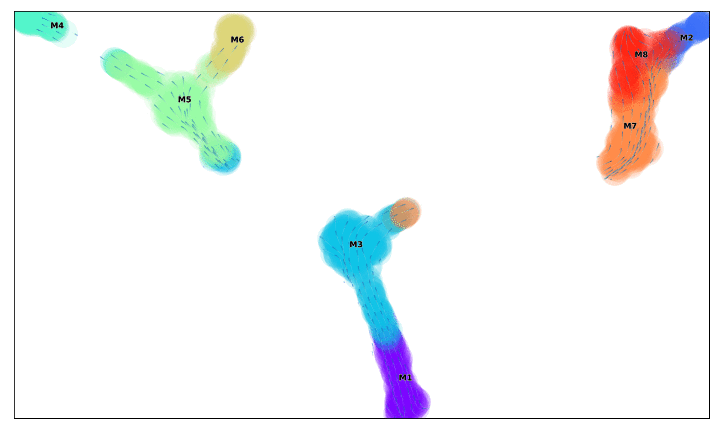

In [15]:
from IPython.display import Image
with open('/home/shobi/Trajectory/Datasets/Toy3/test_toy3.gif','rb') as file:
    display(Image(file.read()))

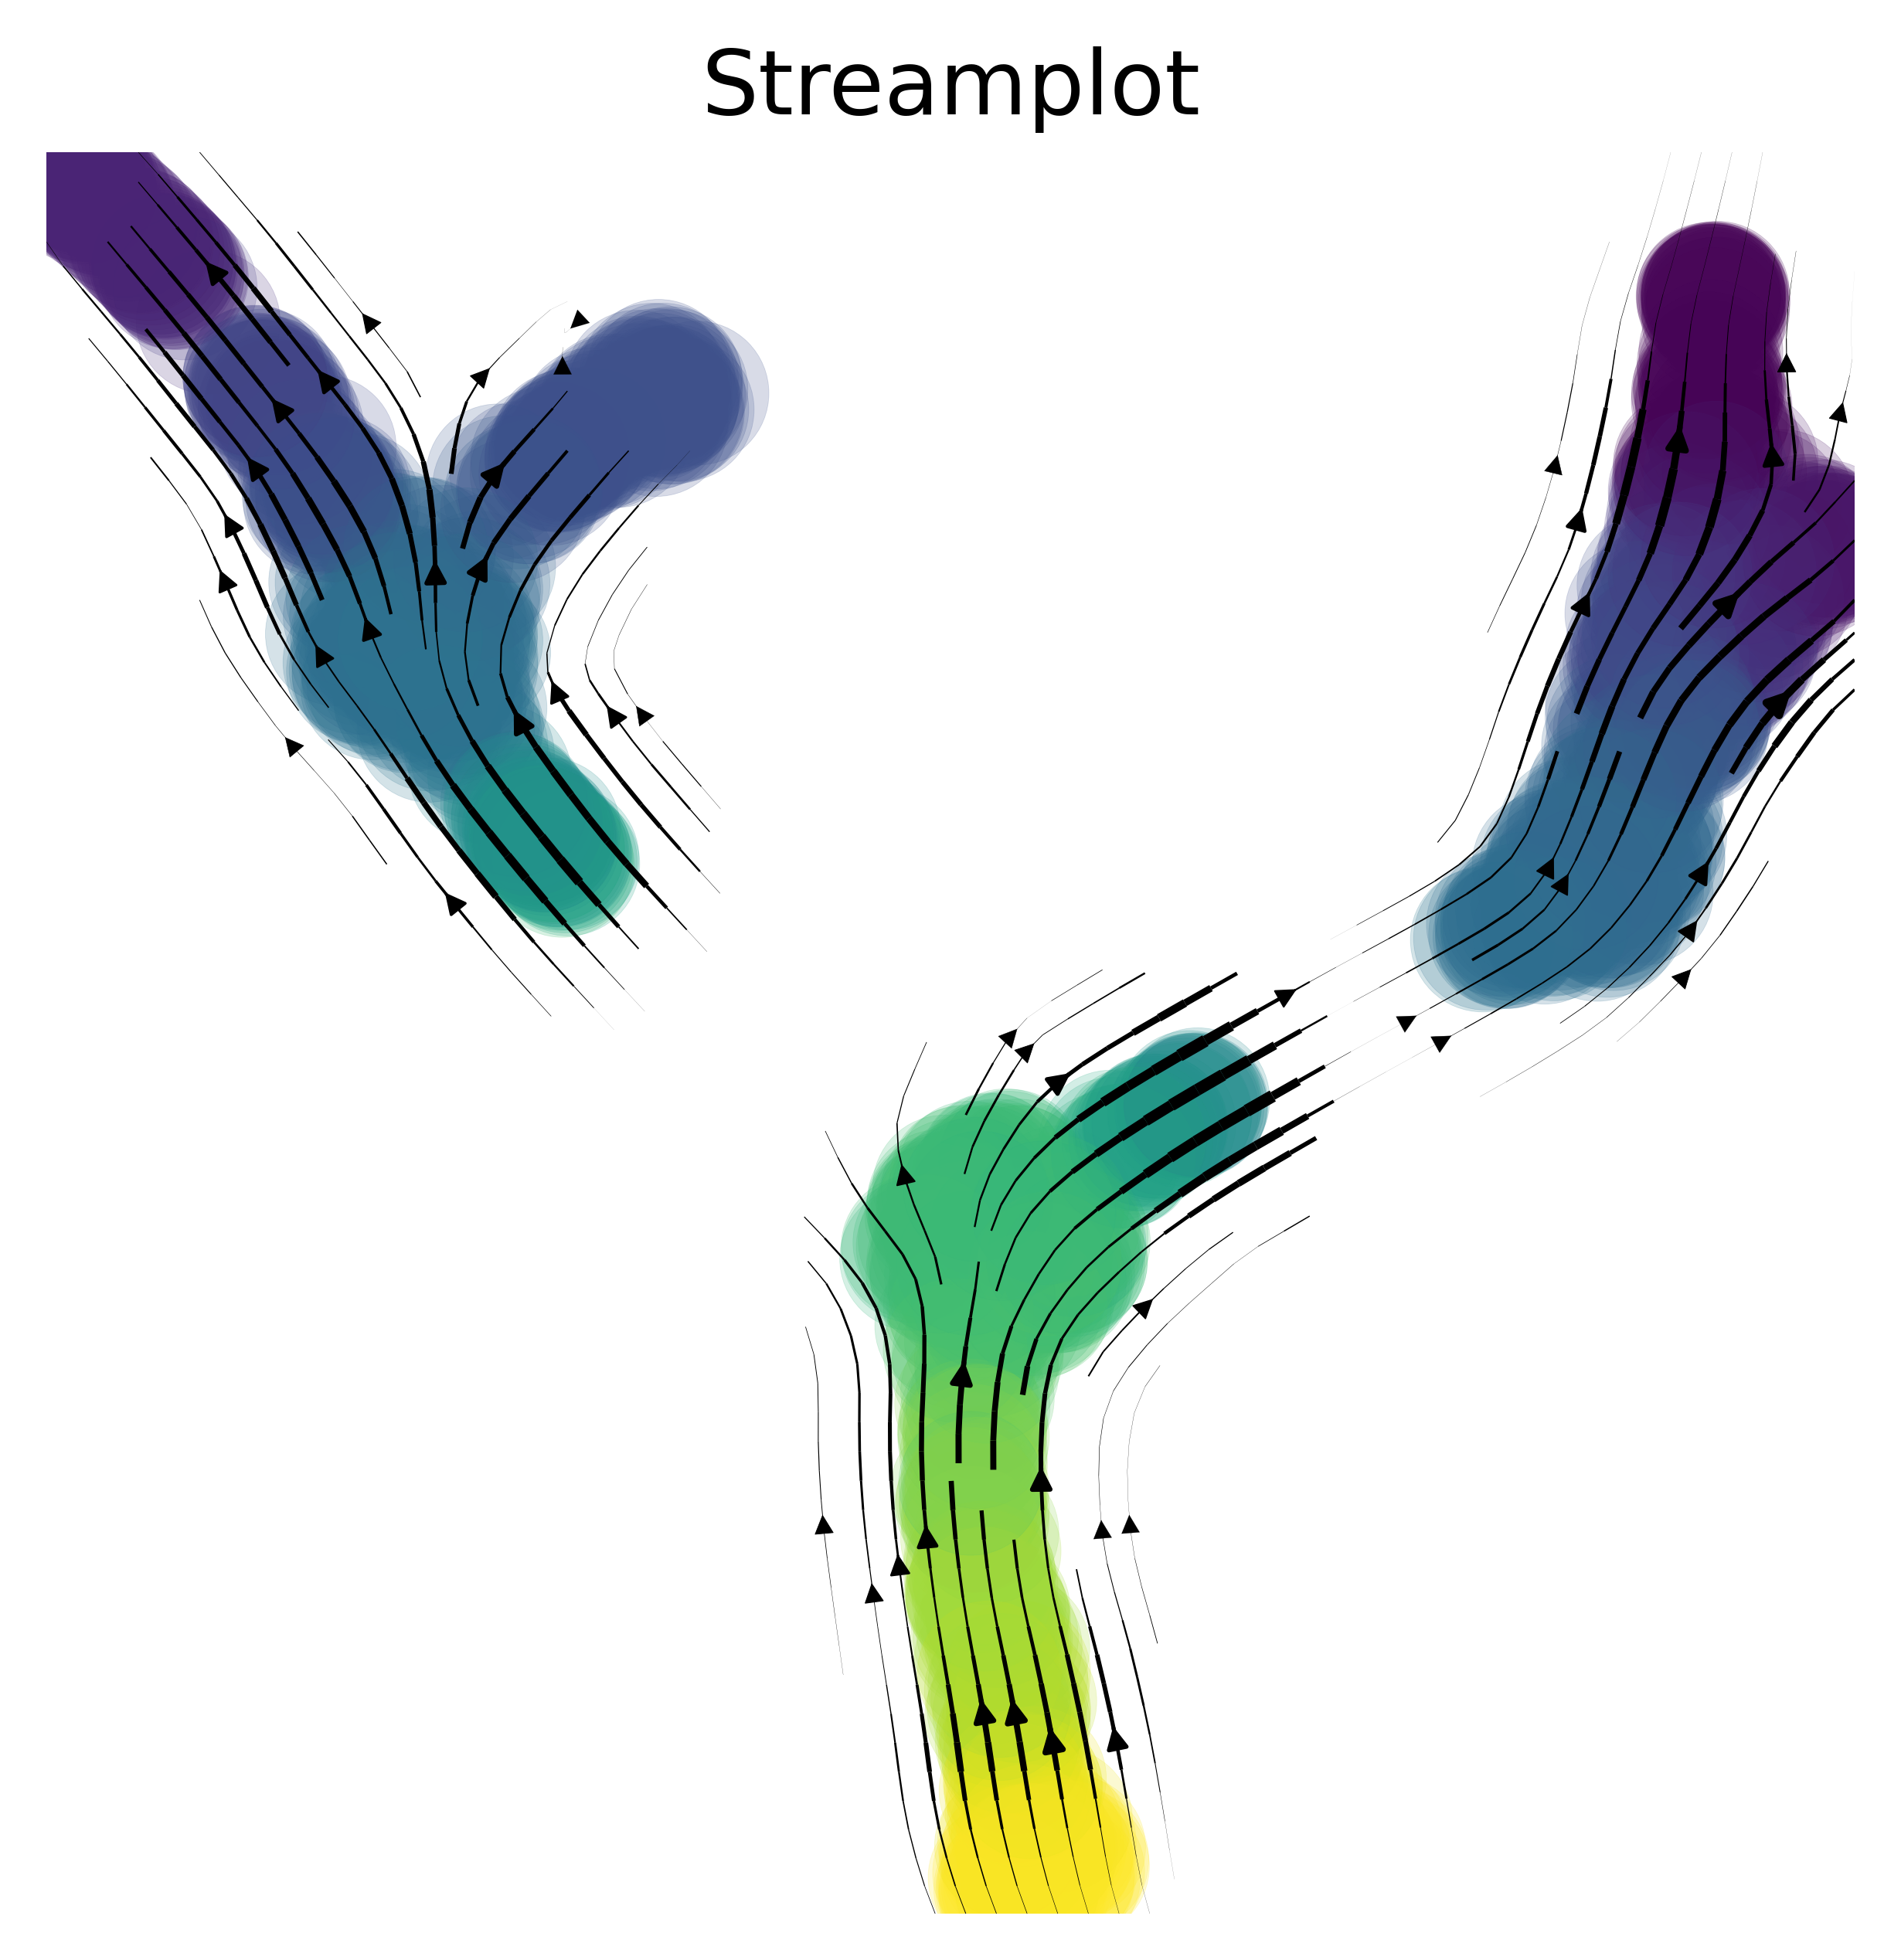

In [9]:
f, ax =via_streamplot(v0, embedding, color_scheme='time',linewidth=1,min_mass = 1, cutoff_perc = 5,scatter_size=500, scatter_alpha=0.2,marker_edgewidth=0.1, density_stream = 2, smooth_transition=1, smooth_grid=.5)# other args: add_outline_clusters=True, cluster_outline_edgewidth =0.005
f.set_size_inches(5,5)

### Overall trajectory 
Draw overall pseudotime and main trajectories on single cell embedding 

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

2022-08-26 13:29:19.041954	Super cluster 4 is a super terminal with sub_terminal cluster 4
2022-08-26 13:29:19.042299	Super cluster 7 is a super terminal with sub_terminal cluster 7
2022-08-26 13:29:19.042495	Super cluster 8 is a super terminal with sub_terminal cluster 8
2022-08-26 13:29:19.042690	Super cluster 9 is a super terminal with sub_terminal cluster 9
2022-08-26 13:29:19.042879	Super cluster 10 is a super terminal with sub_terminal cluster 10


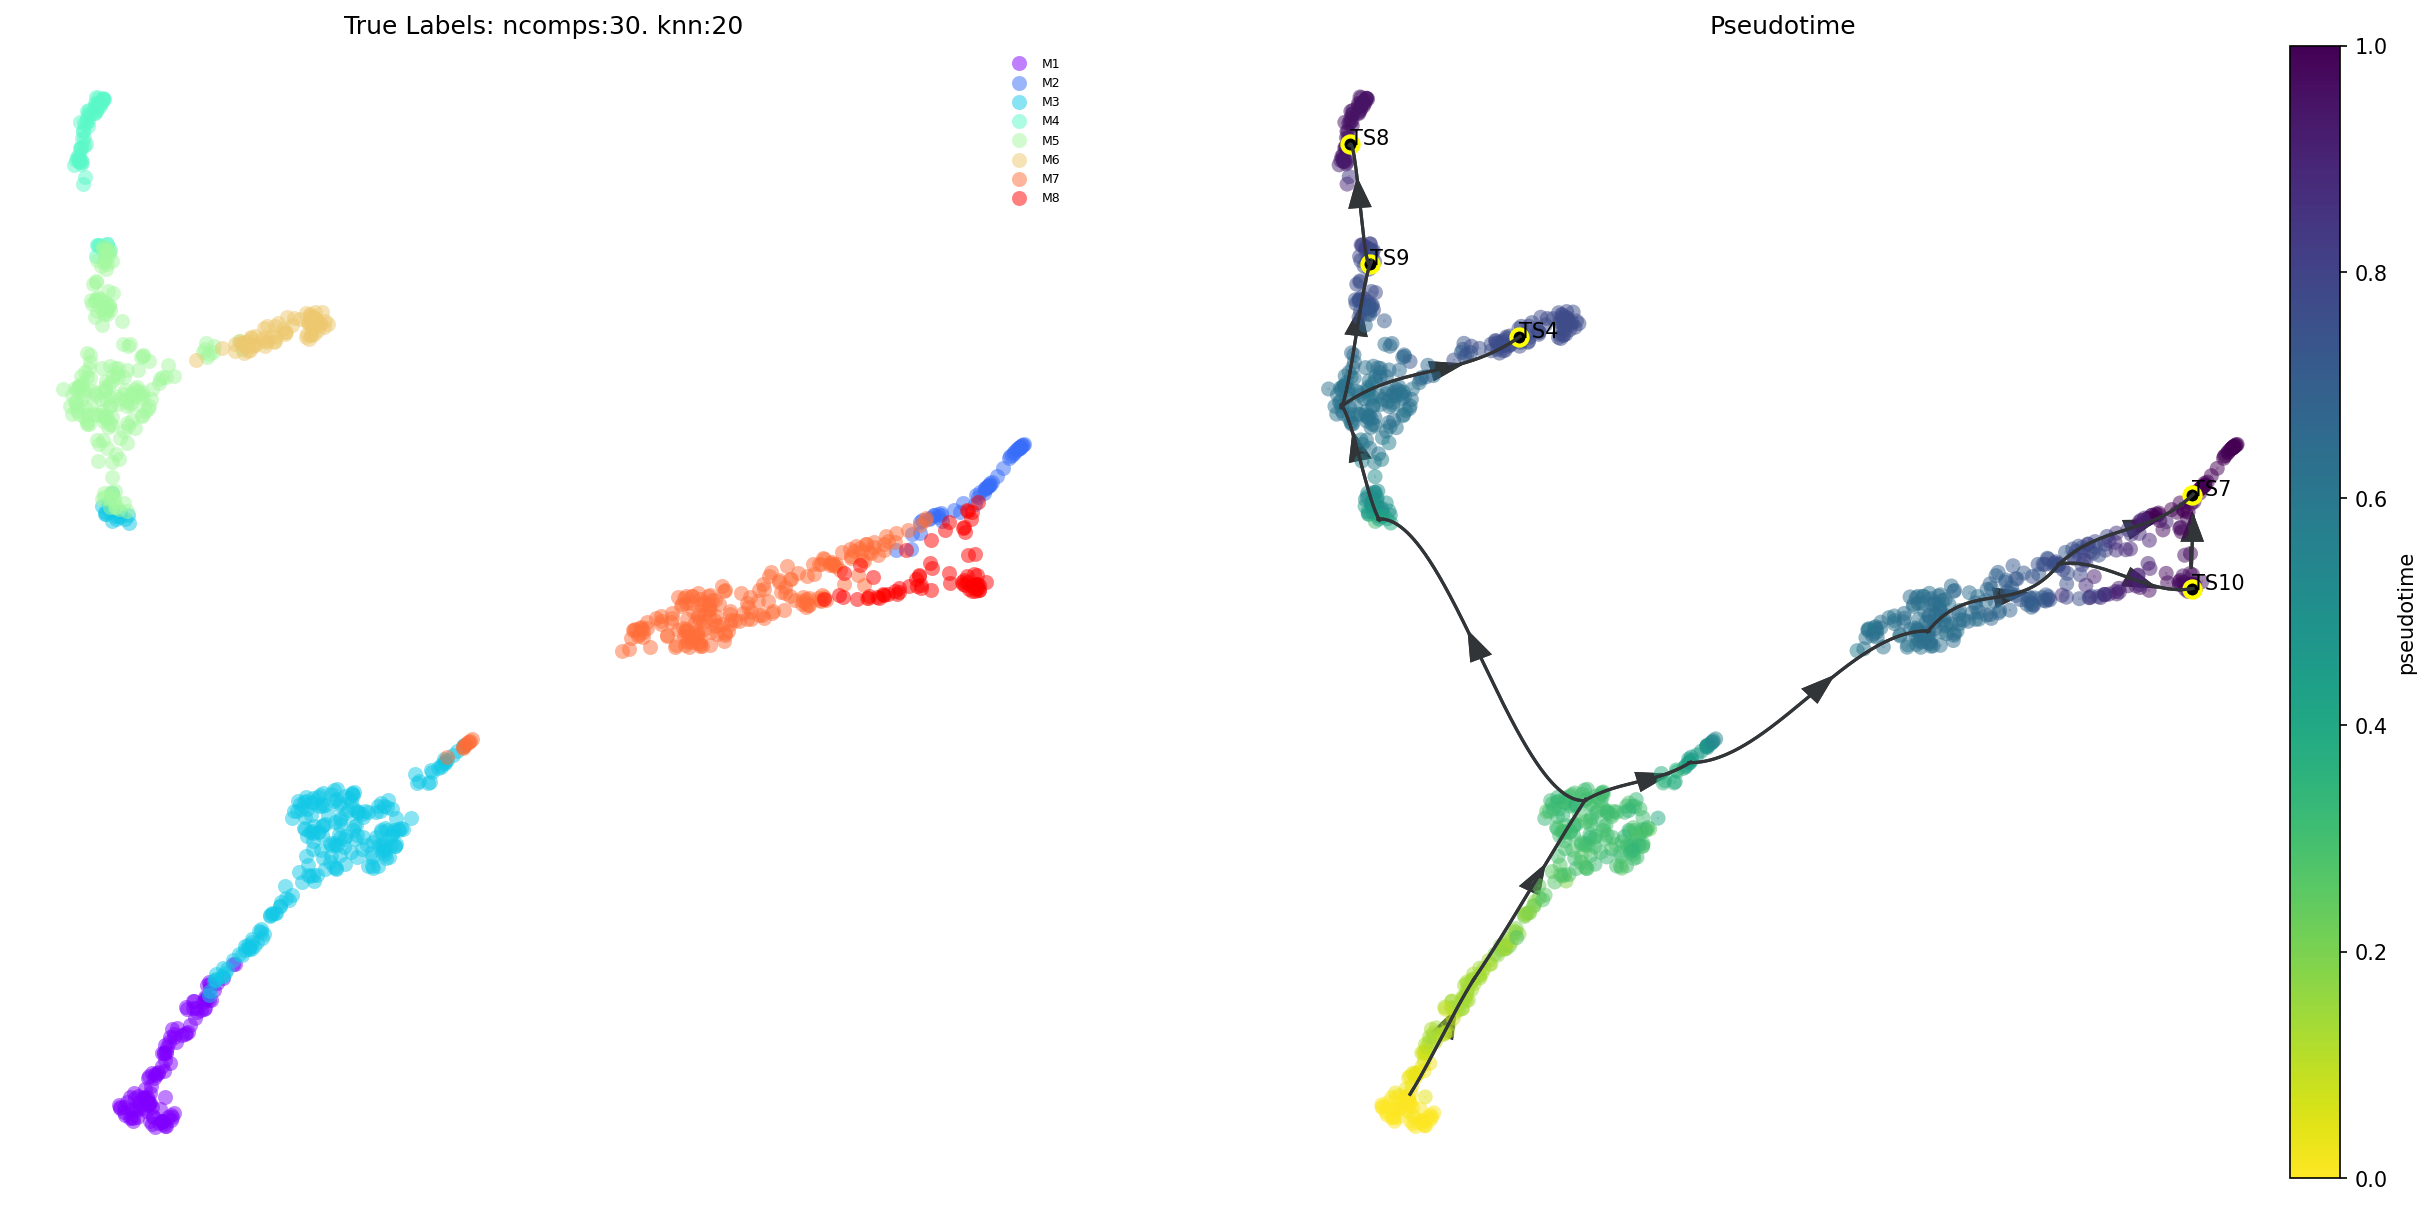

In [11]:
# draw overall pseudotime and main trajectories
draw_trajectory_gams(via_object=v0, via_fine=v0, embedding=embedding)
plt.show()

### Lineage probabilities
Plot the lineage probabilities for each lineage (associated with a terminal state)

2023-09-14 16:40:48.784901	Marker_lineages: [4, 7, 8, 9, 10]
2023-09-14 16:40:48.788786	The number of components in the original full graph is 1
2023-09-14 16:40:48.788847	For downstream visualization purposes we are also constructing a low knn-graph 
2023-09-14 16:40:49.296228	Check sc pb 1.0000000000000002 
2023-09-14 16:40:49.324406	Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 4: [6, 3, 1, 11, 2, 4]
2023-09-14 16:40:49.324460	Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 7: [6, 3, 1, 12, 0, 5, 7]
2023-09-14 16:40:49.324485	Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 8: [6, 3, 1, 11, 2, 8]
2023-09-14 16:40:49.324506	Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 9: [6, 3, 1, 11, 2, 8, 9]
2023-09-14 16:40:49.324523	Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 10: [6, 3, 1, 12, 0, 5, 10]
2023-09-14 16:40:49.467497	Revised Clu

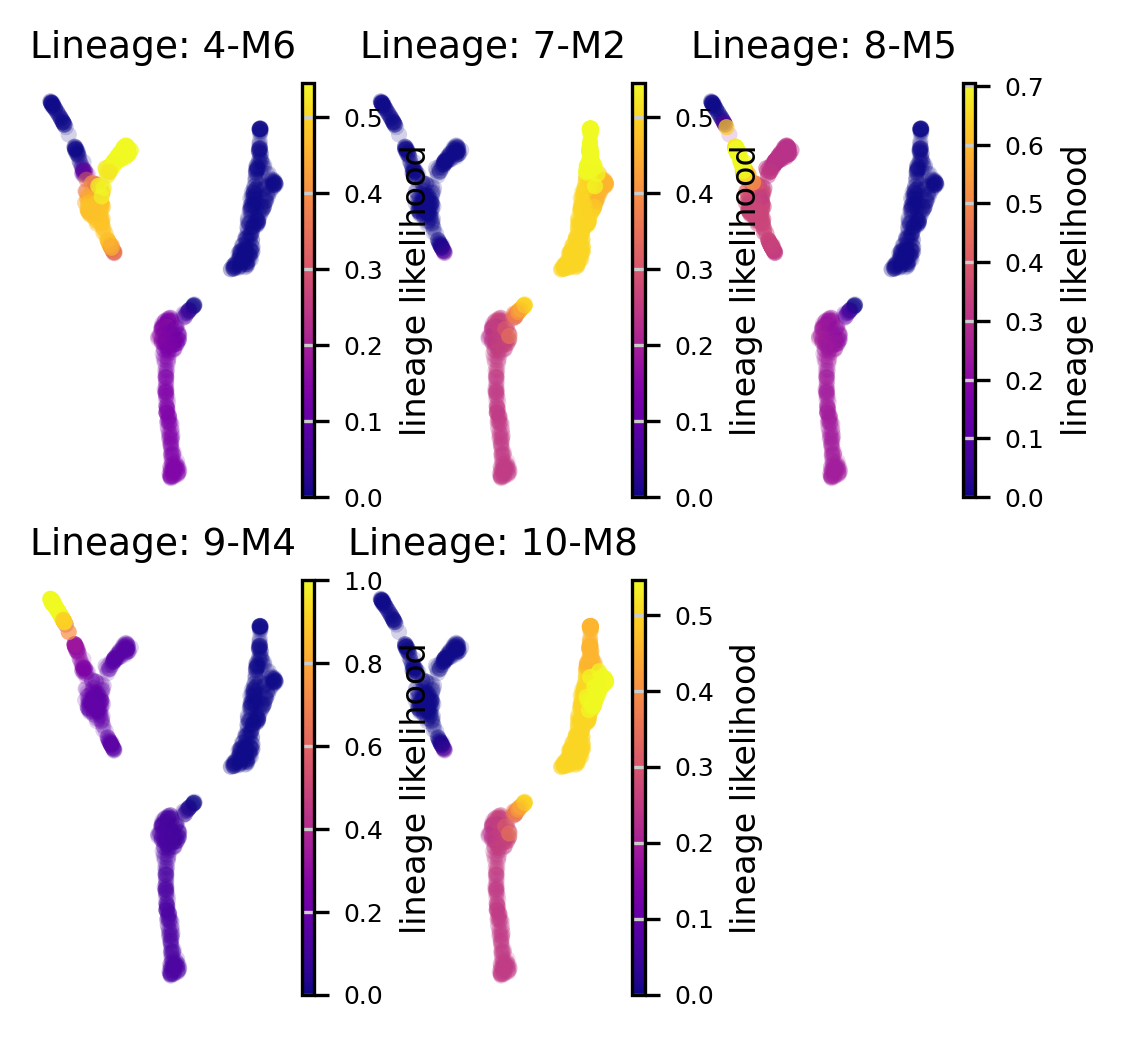

In [10]:
f, axs = draw_sc_lineage_probability(via_object=v0, via_fine=v0,embedding=embedding)
plt.show()
f.set_size_inches(15,2)

### Lineage Pathways - edge views

2023-09-14 16:40:55.881527	Computing Edges
2023-09-14 16:40:55.881970	WARNING: VIA will now autocompute an embedding. It would be better to precompute an embedding using embedding = via_umap() or via_mds() and setting this as the embedding attribute via_object = embedding.
2023-09-14 16:40:55.882010	Commencing Via-MDS
2023-09-14 16:40:55.882041	Resetting n_milestones to 1000 as n_samples > original n_milestones
2023-09-14 16:40:56.417341	Start computing with diffusion power:1
2023-09-14 16:40:56.435767	Starting MDS on milestone
2023-09-14 16:40:57.832292	End computing mds with diffusion power:1
2023-09-14 16:40:57.833944	Start finding milestones


/home/user/anaconda3/envs/Via2Env_py10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2023-09-14 16:40:58.062650	End milestones with 50
2023-09-14 16:40:58.064574	Recompute weights
2023-09-14 16:40:58.076468	pruning milestone graph based on recomputed weights
2023-09-14 16:40:58.077460	Graph has 1 connected components before pruning
2023-09-14 16:40:58.078066	Graph has 1 connected components after pruning
2023-09-14 16:40:58.078237	Graph has 1 connected components after reconnecting
2023-09-14 16:40:58.078883	regenerate igraph on pruned edges
2023-09-14 16:40:58.083058	Setting numeric label as time_series_labels or other sequential metadata for coloring edges
2023-09-14 16:40:58.090859	Making smooth edges
location of 4 is at [0] and 0


TypeError: 'NoneType' object is not subscriptable

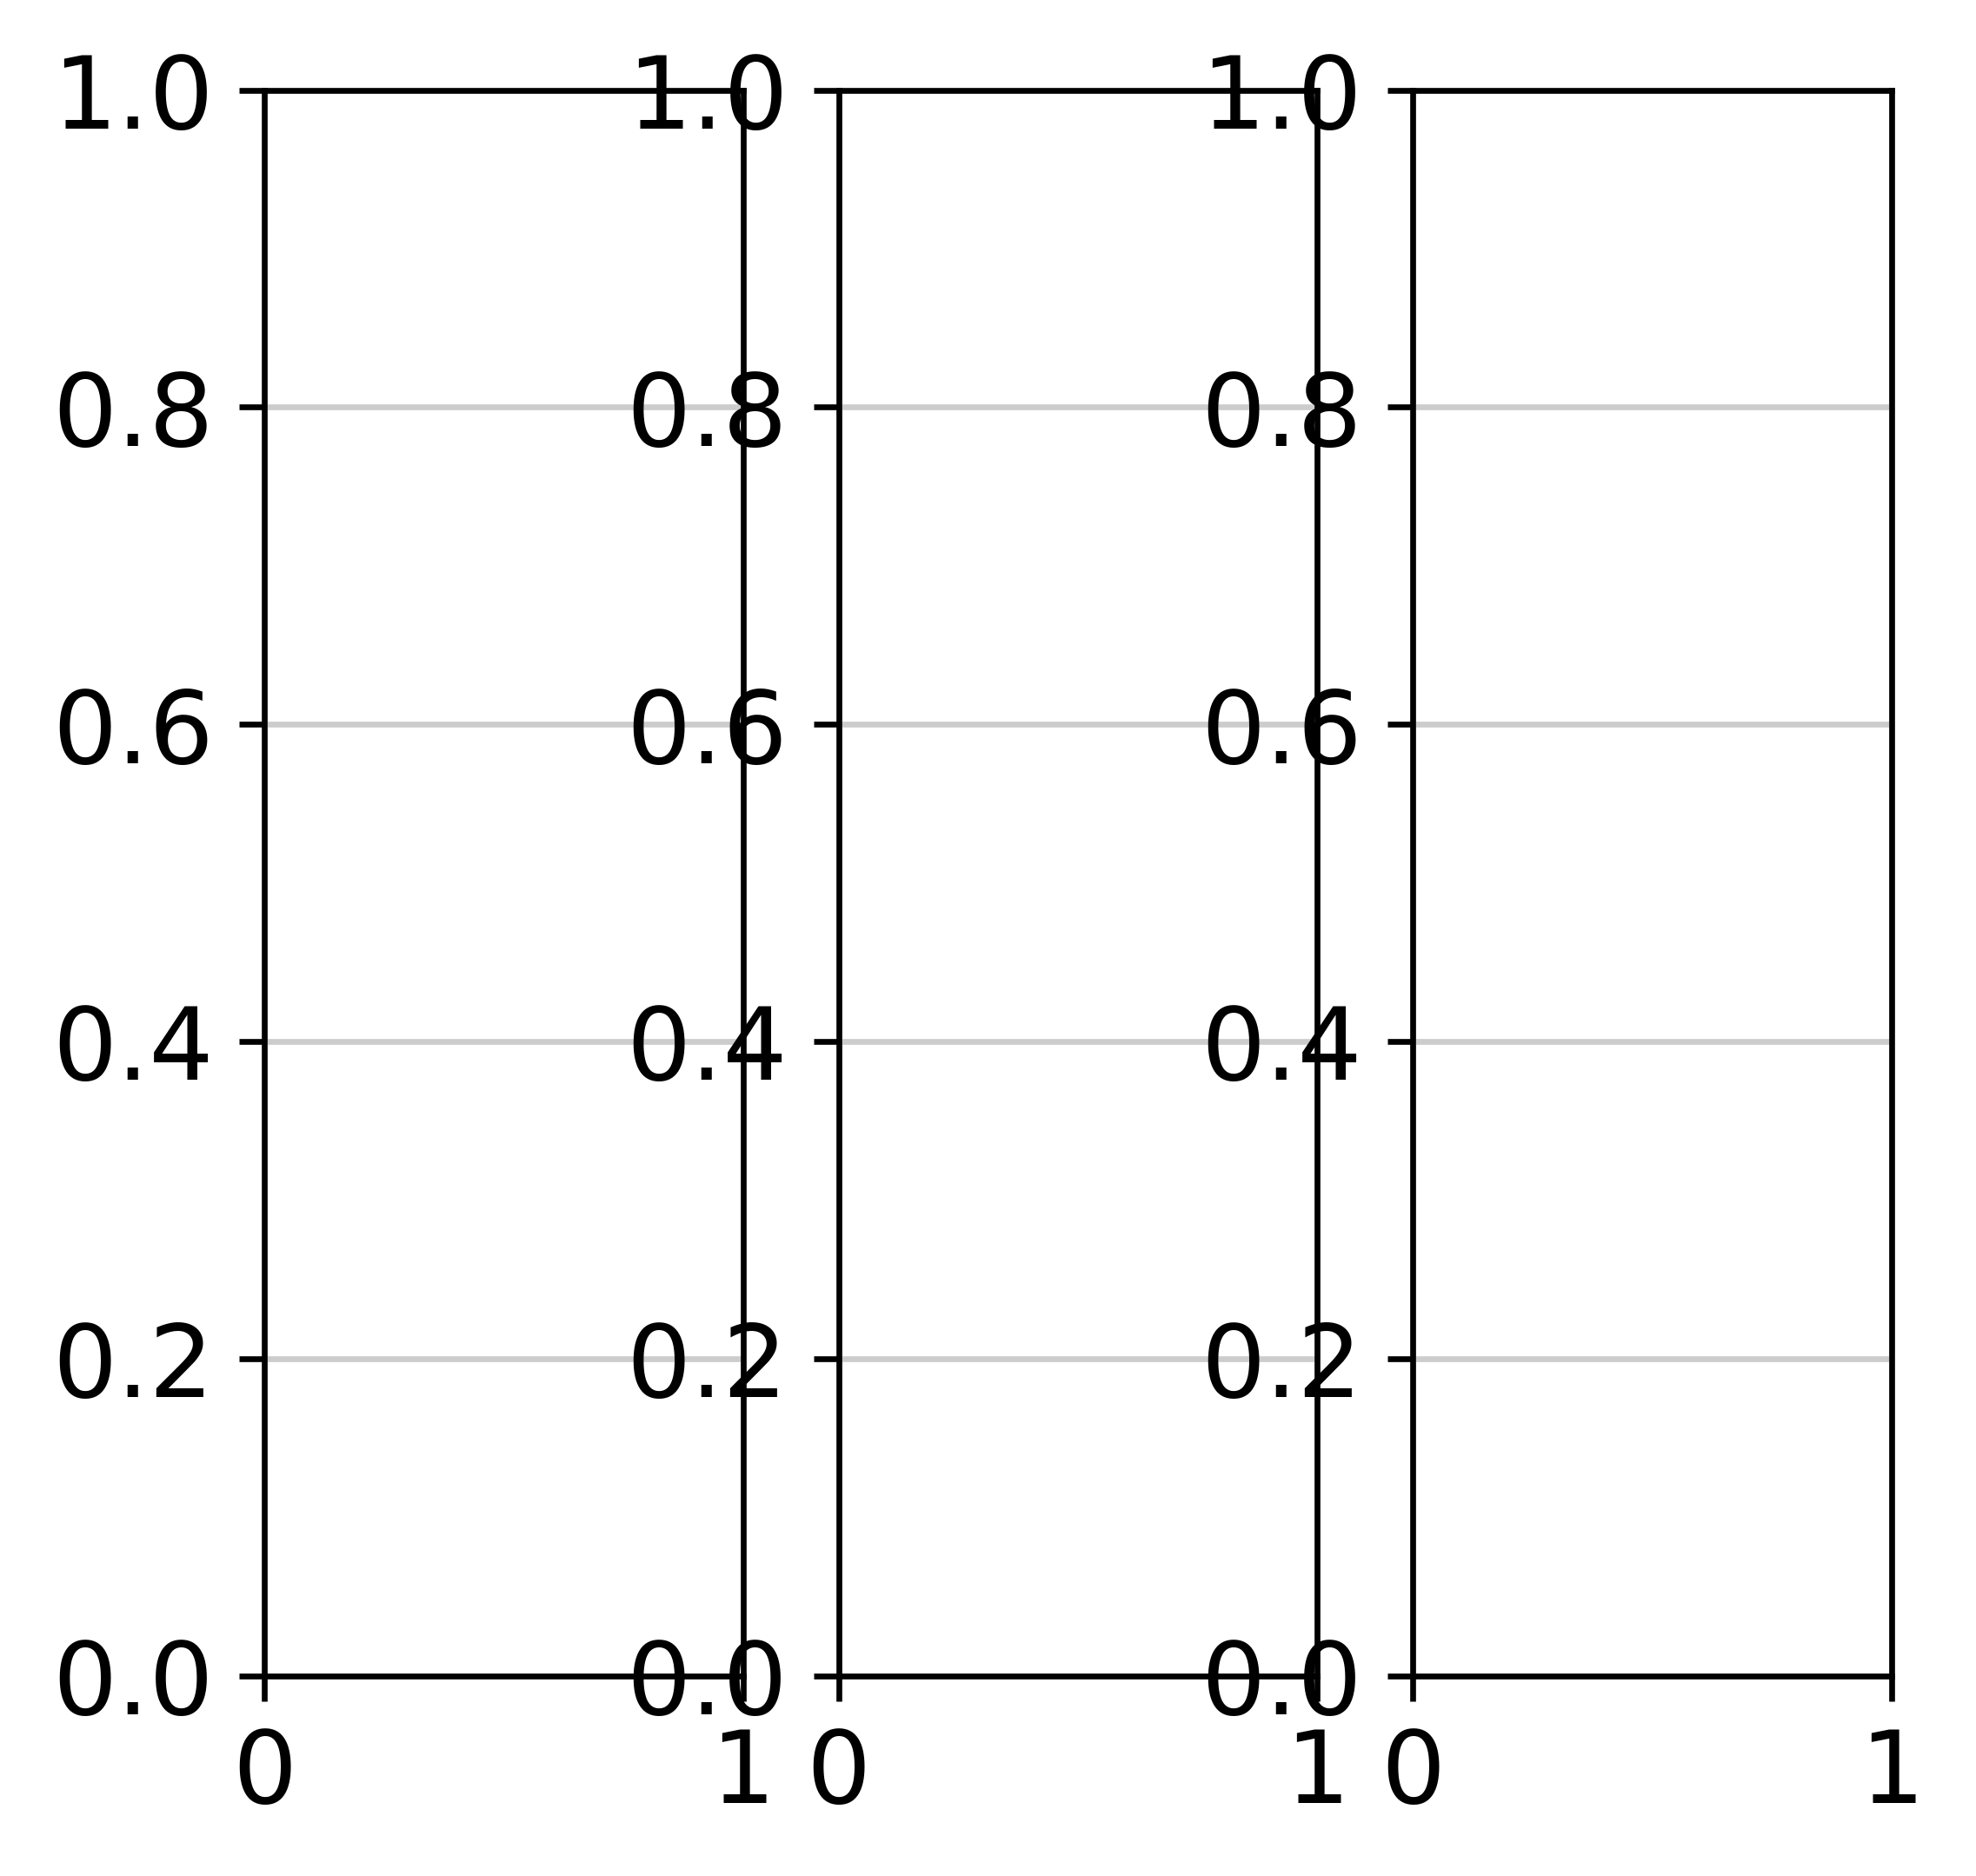

In [11]:
f,ax = plot_edge_bundle(via_object=v0, n_milestones=50, linewidth_bundle=1.5, alpha_bundle_factor=2,
                     cmap='plasma', facecolor='white', size_scatter=15, alpha_scatter=0.2, scale_scatter_size_pop=True,
                     extra_title_text='', headwidth_bundle=0.5, lineage_pathway = [4,7,8], text_labels=False, sc_labels=true_label)
f.set_size_inches(15,4)

###  Gene Dynamics
Plot the gene expression levels along each lineage for marker genes. Here we use dummy values for the Genes which are just the values of the initial PCs for illustrative purposes

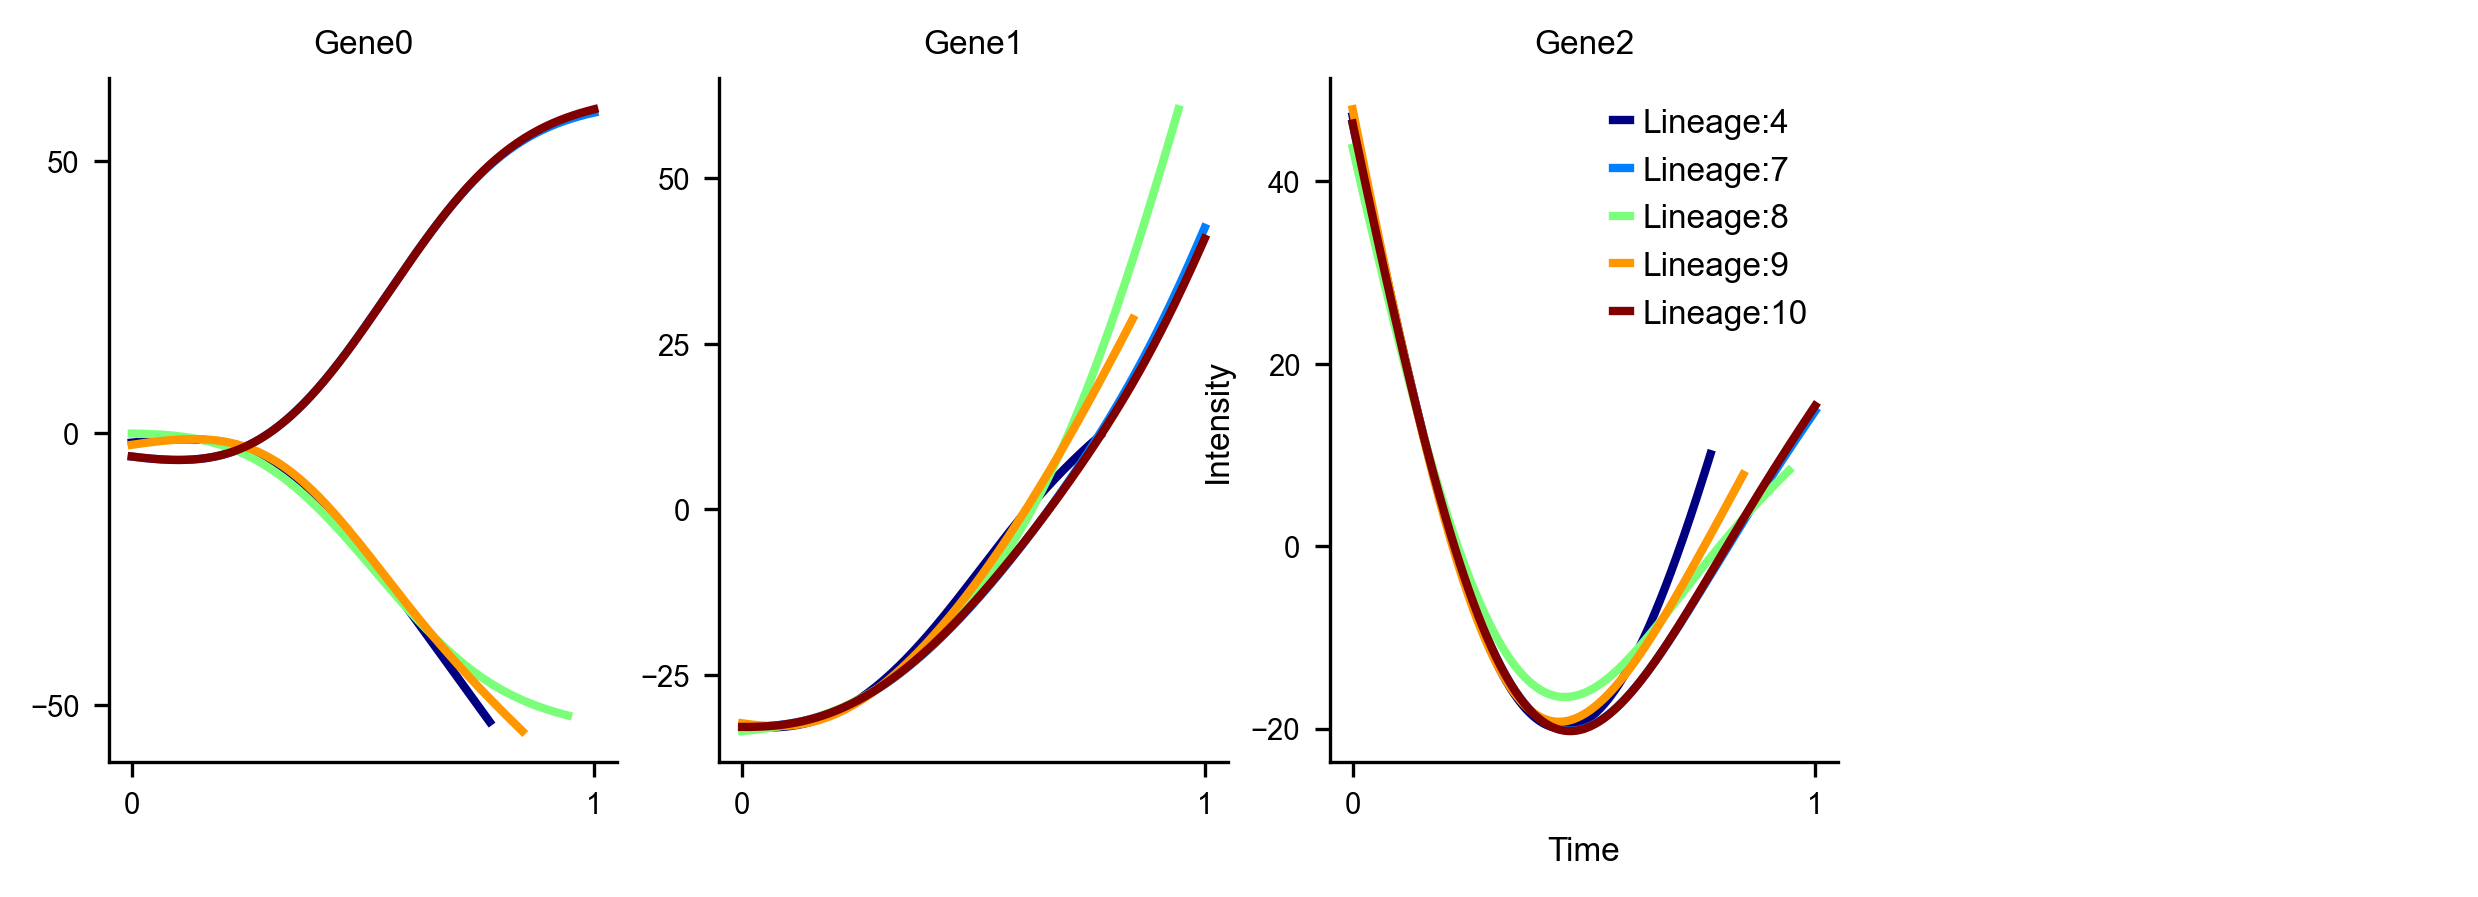

In [19]:
df_subset = pd.DataFrame(adata_counts.obsm['X_pca'][:, 0:3], columns=['Gene0', 'Gene1', 'Gene2'])
f, axs = get_gene_expression(via0=v0, gene_exp=df_subset, cmap='jet',linewidth=2, fontsize_=8, spline_order=4, n_splines=10) #default parameters shown here for retrieving gene expression
f.set_size_inches(10,3)


2023-01-06 15:01:56.908671	Computing Edges
2023-01-06 15:01:56.908944	Start finding milestones
2023-01-06 15:01:57.161464	End milestones
2023-01-06 15:01:57.163345	Recompute weights
2023-01-06 15:01:57.165011	pruning milestone graph based on recomputed weights
2023-01-06 15:01:57.165856	Graph has 1 connected components before pruning
2023-01-06 15:01:57.166166	Graph has 1 connected components before pruning
2023-01-06 15:01:57.167271	regenerate igraph on pruned edges
2023-01-06 15:01:57.172146	Setting numeric label as time_series_labels or other sequential metadata for coloring edges
2023-01-06 15:01:57.177309	Making smooth edges
2023-01-06 15:01:57.510906	Computing Edges
2023-01-06 15:01:57.511040	Start finding milestones
2023-01-06 15:01:57.654583	End milestones
2023-01-06 15:01:57.656575	Recompute weights
2023-01-06 15:01:57.659783	pruning milestone graph based on recomputed weights
2023-01-06 15:01:57.660657	Graph has 1 connected components before pruning
2023-01-06 15:01:57.660979

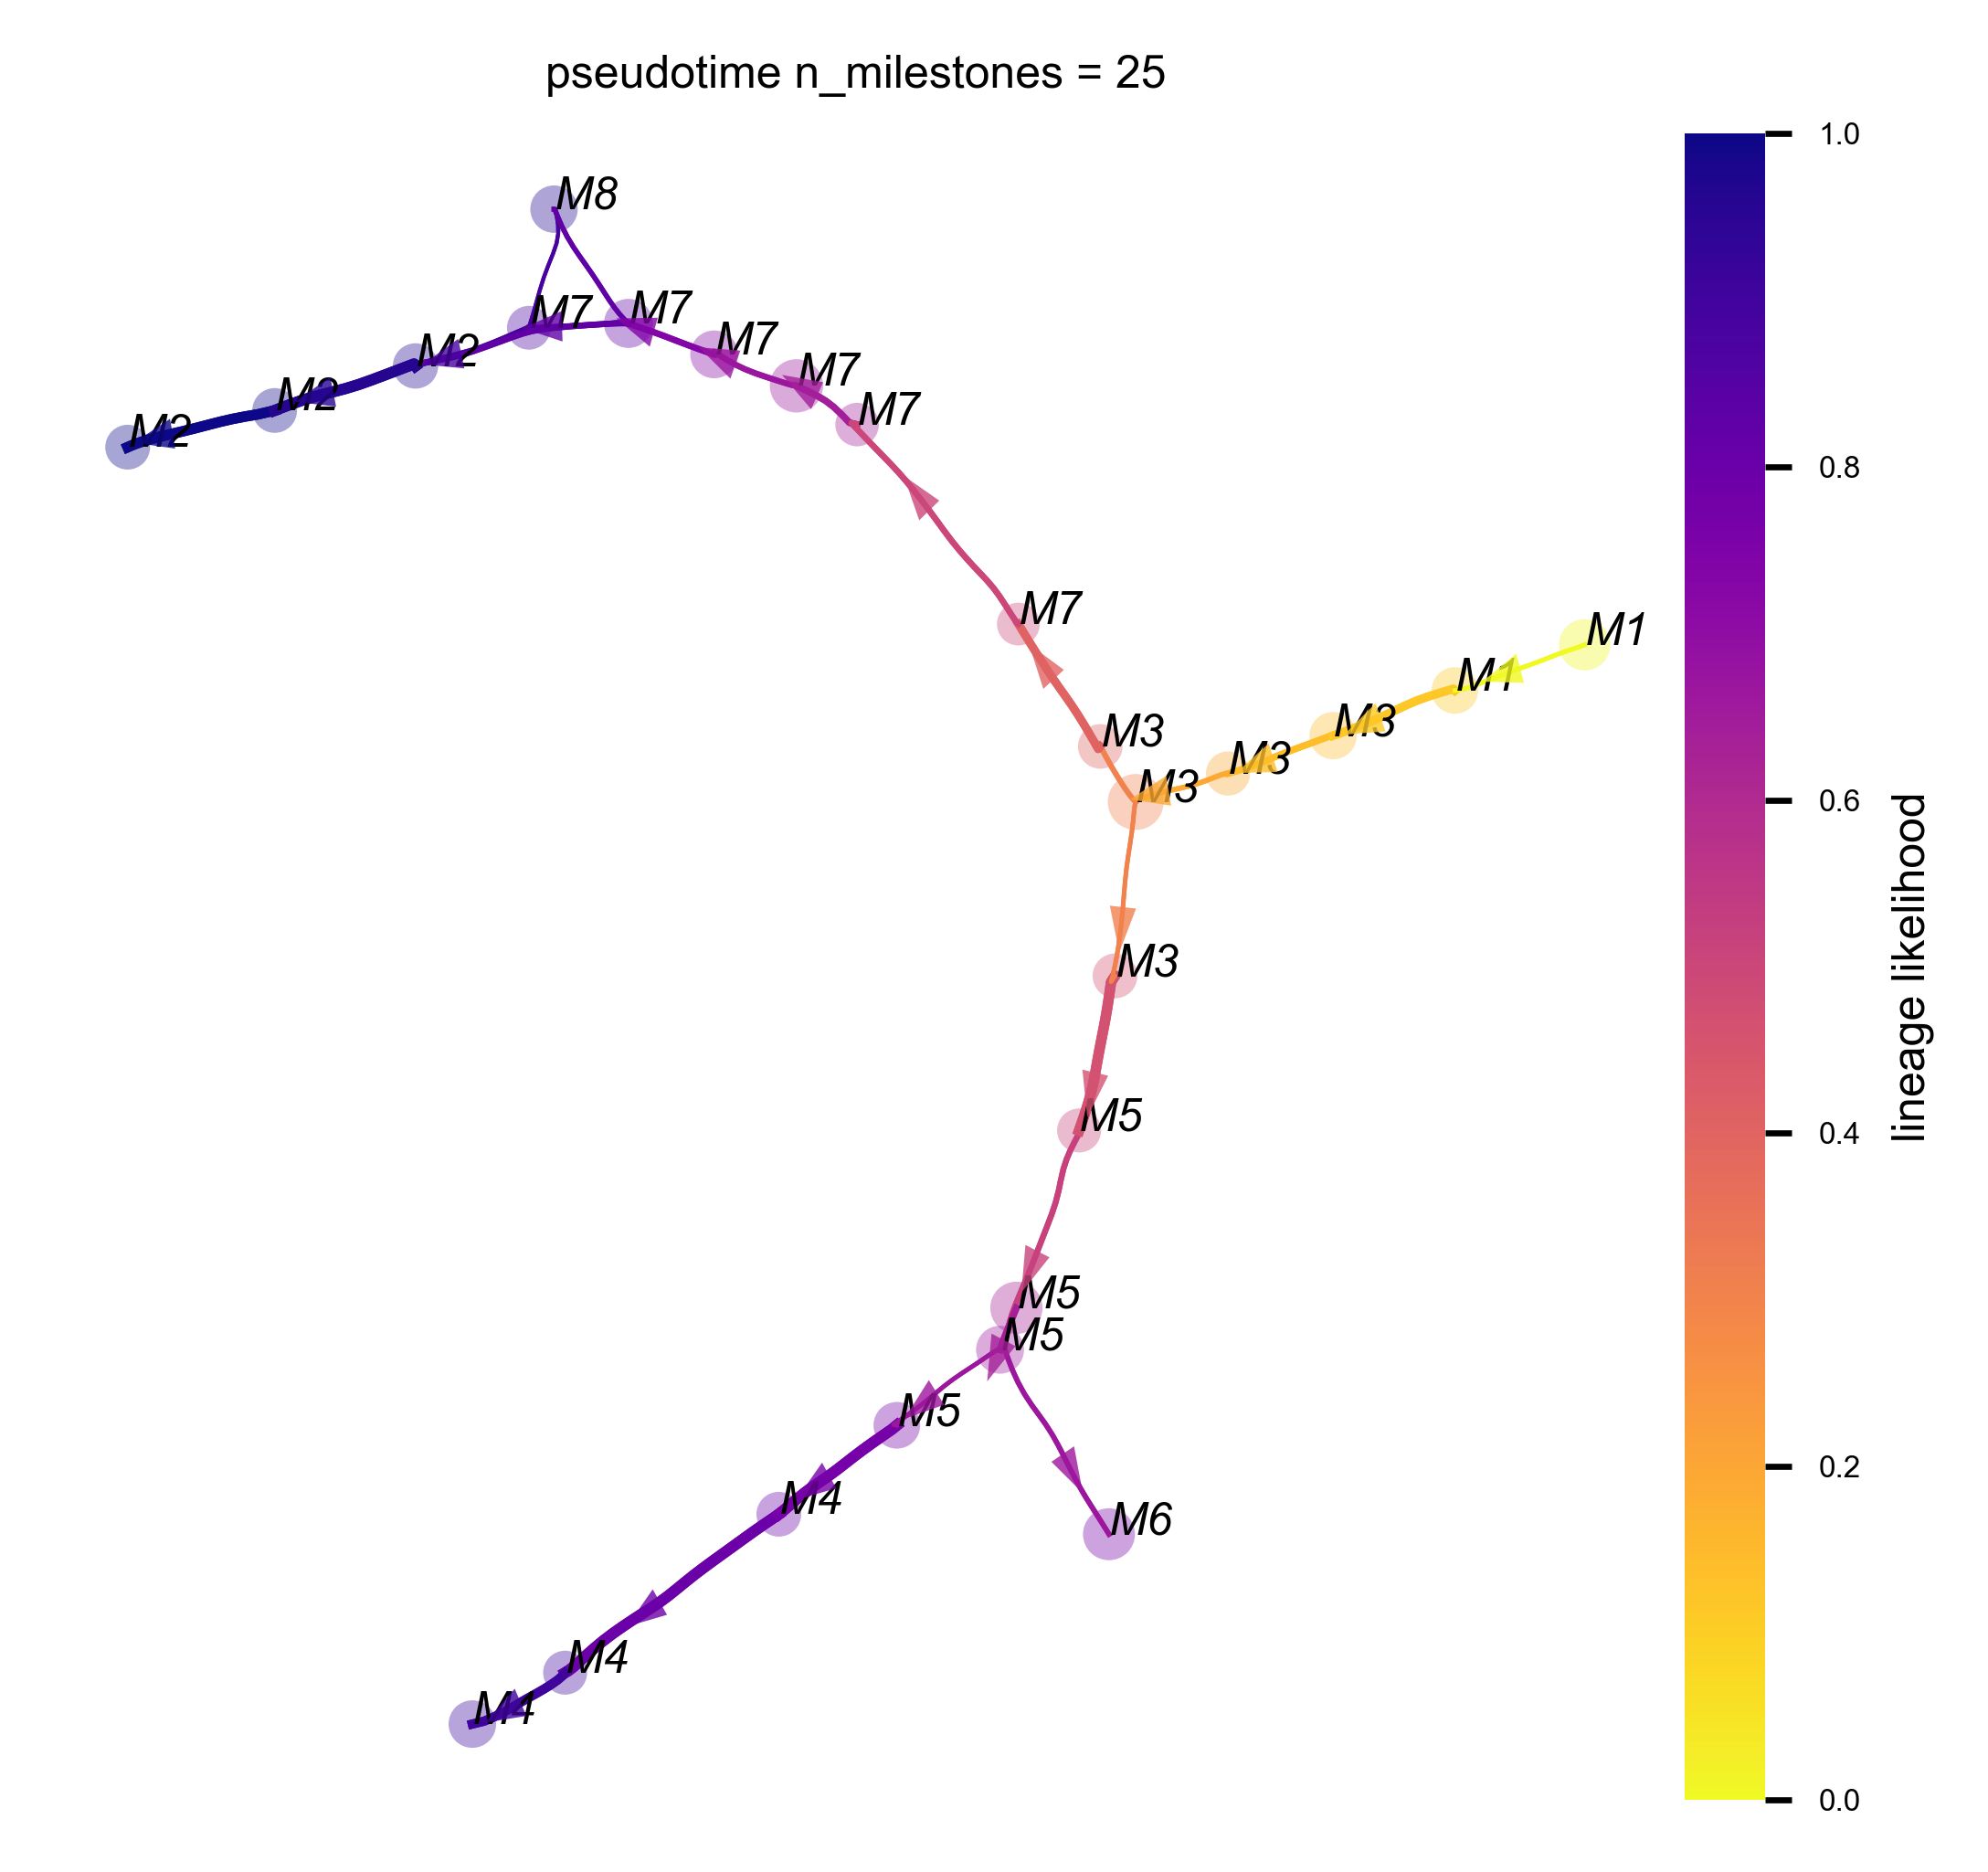

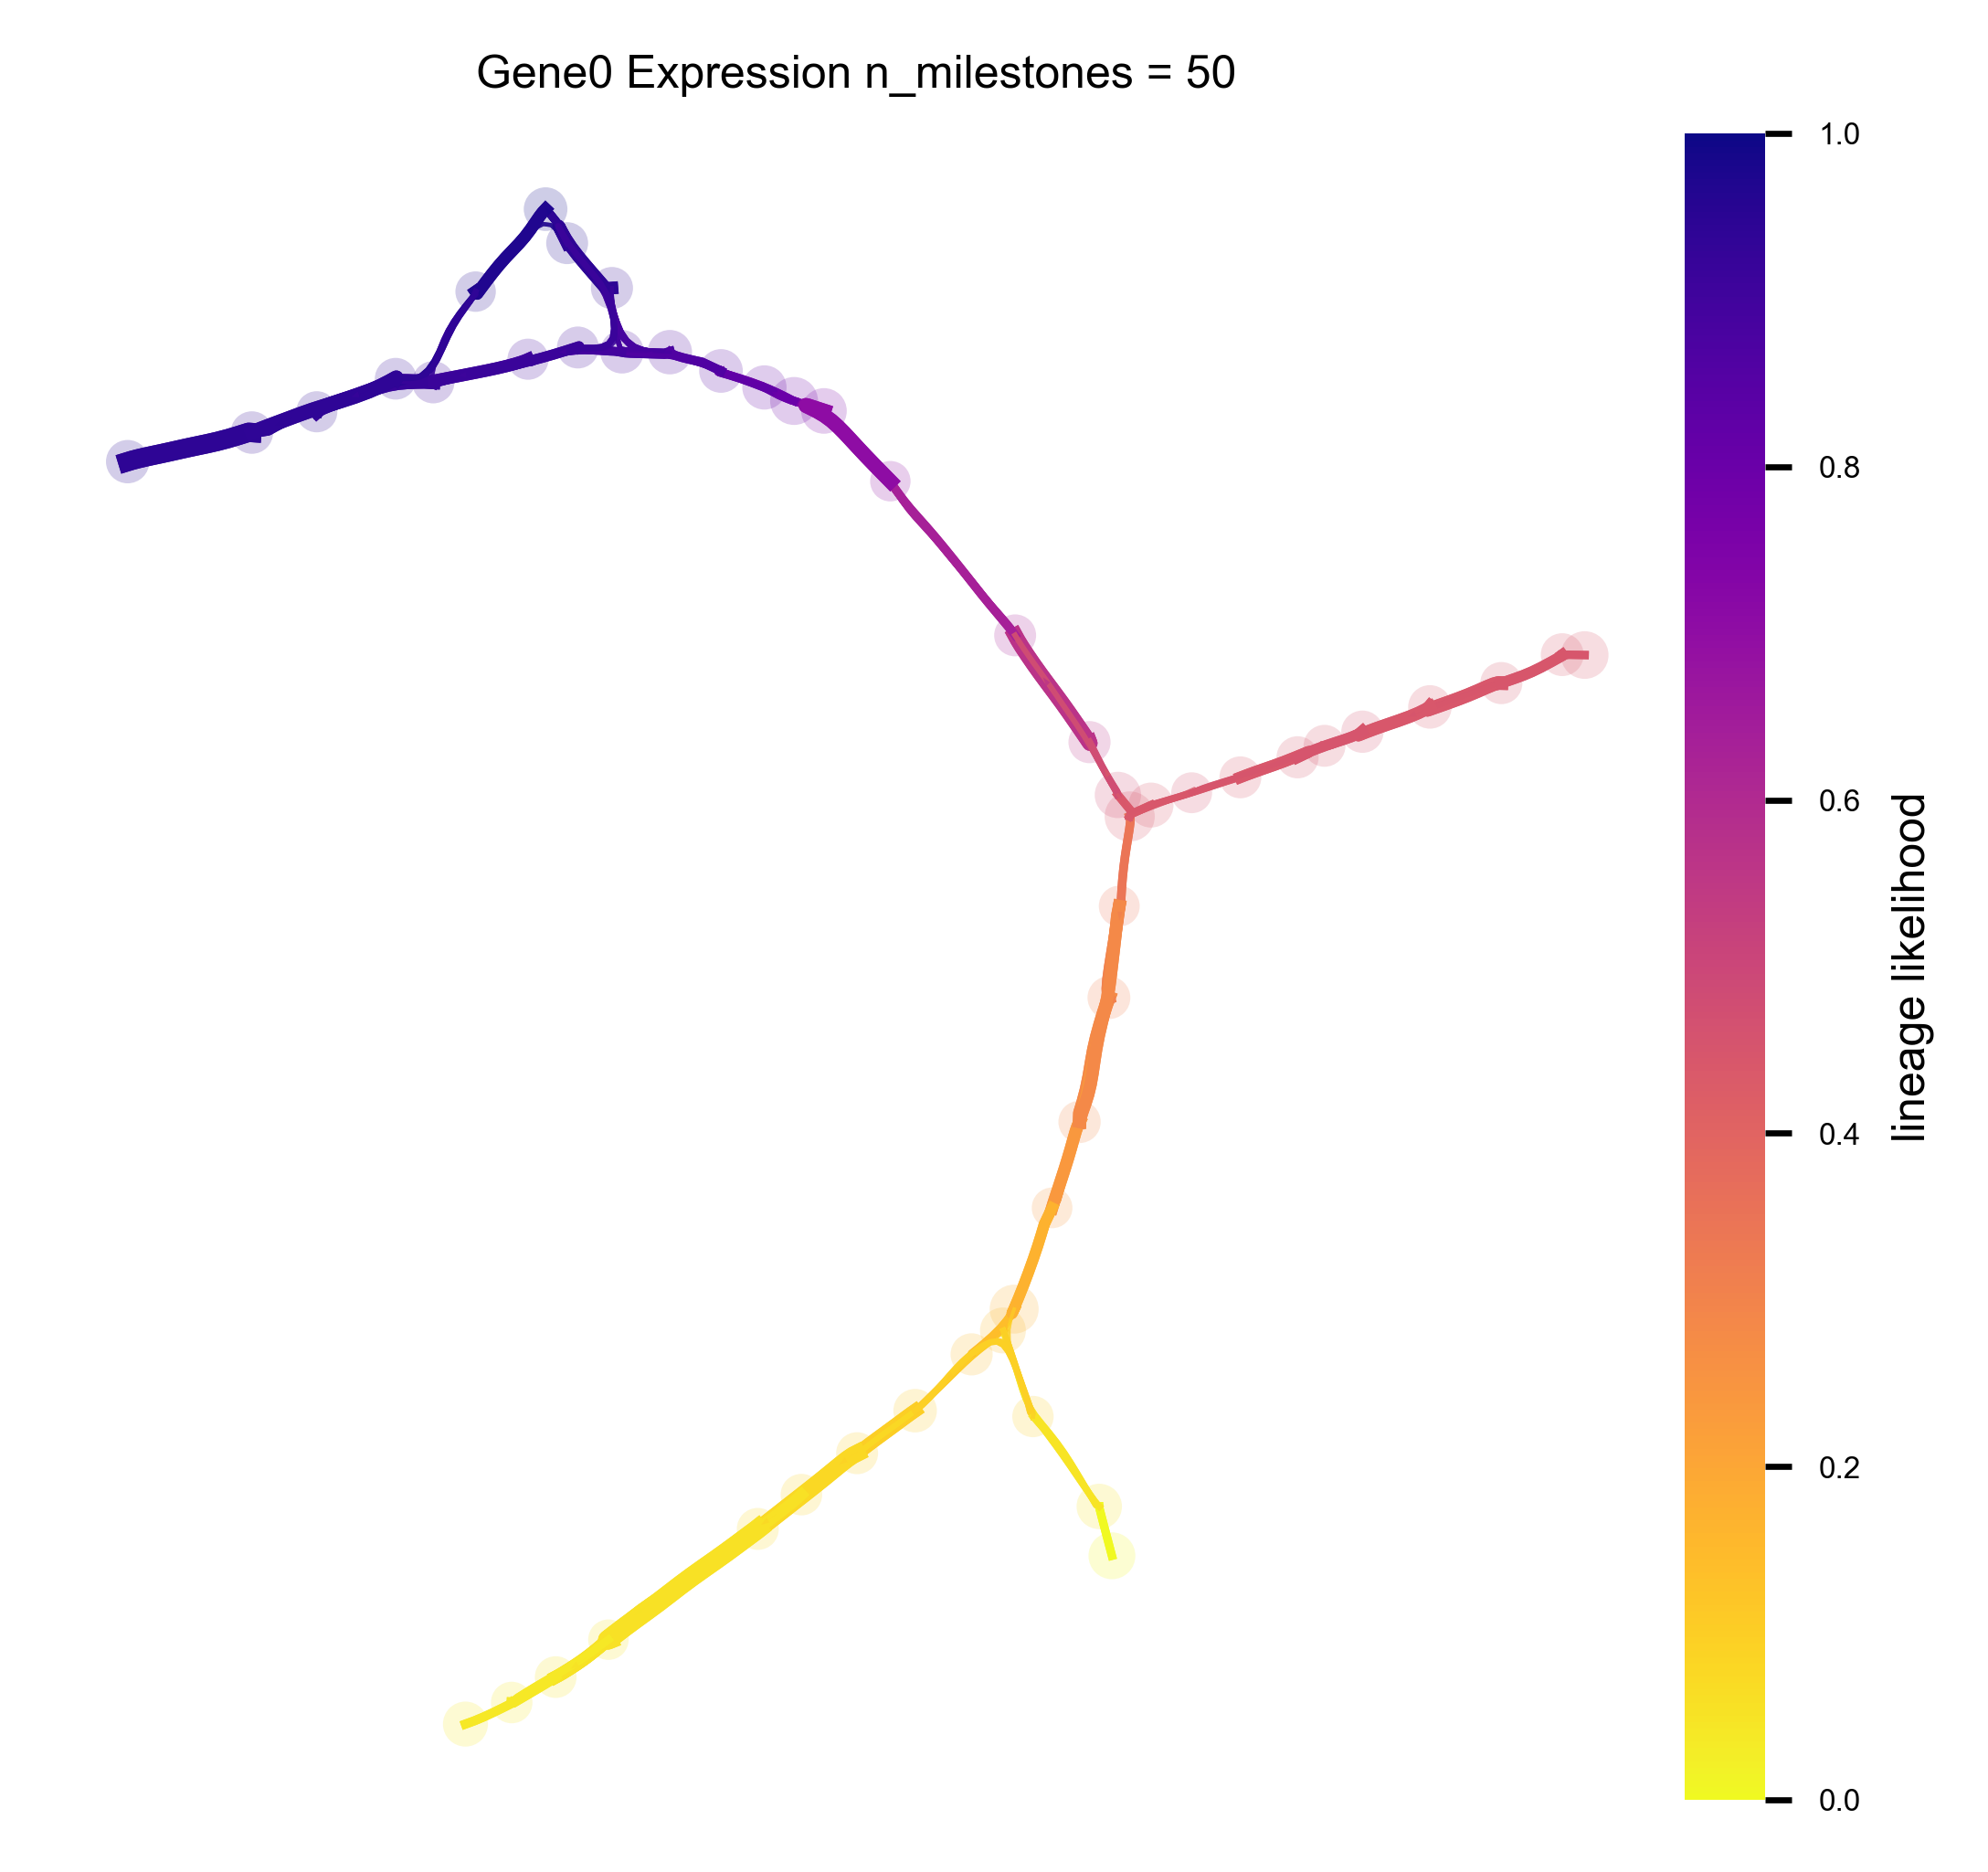

In [8]:
v0.embedding = via_mds_embedding2
f,ax = plot_edge_bundle(via_object=v0, n_milestones=25, linewidth_bundle=0.5, alpha_bundle_factor=2,
                     cmap='plasma_r', facecolor='white', size_scatter=15, alpha_scatter=0.2, scale_scatter_size_pop=True,
                     extra_title_text='pseudotime', headwidth_bundle=2.5, text_labels=True, sc_labels=true_label)
f,ax = plot_edge_bundle(via_object=v0, n_milestones=50, linewidth_bundle=1.5, alpha_bundle_factor=2,
                     cmap='plasma_r', facecolor='white', size_scatter=15, alpha_scatter=0.2, scale_scatter_size_pop=True,
                     extra_title_text='Gene0 Expression', headwidth_bundle=0.5, sc_labels_expression = adata_counts.obsm['X_pca'][:, 0].tolist(), text_labels=False, sc_labels=true_label)


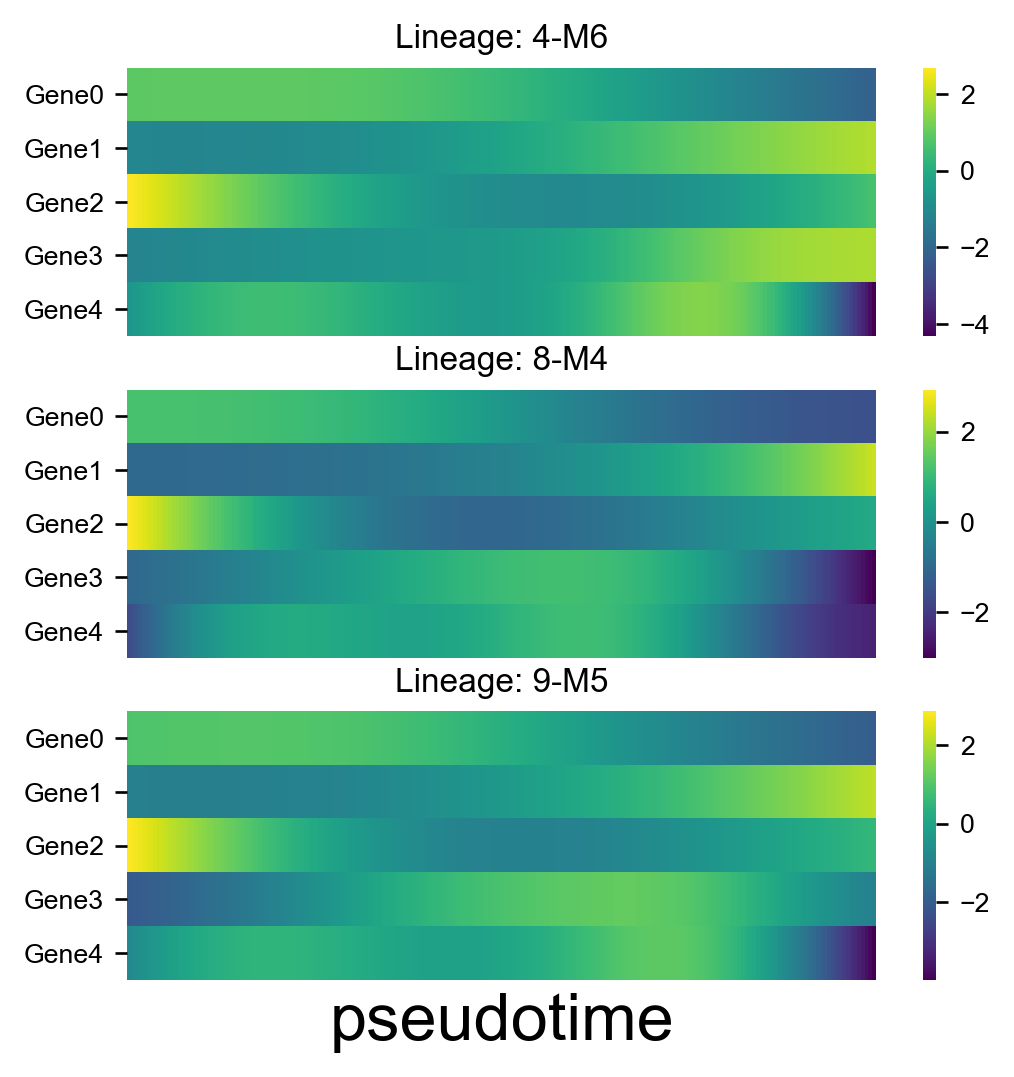

In [17]:
df_genes = pd.DataFrame(adata_counts.obsm['X_pca'][:, 0:5], columns=['Gene0', 'Gene1', 'Gene2', 'Gene3', 'Gene4'])

f, axlist = plot_gene_trend_heatmaps(via_object=v0, df_gene_exp=df_genes, marker_lineages=[4,8,9])
axlist[-1].set_xlabel("pseudotime", fontsize=20)
f.set_size_inches(5,5)

## Pre-defined terminal states and Integrated Visualization 

- In some cases you may have a good idea of what the terminal states are, in this case you can set them when initalized VIA based on group level corresponding to true_label or single-cell level as a list of string or integers
    - `user_defined_terminal_group=['M6','M8','M2','M7']`
    - `user_defined_terminal_cell = [89,560,808]`
- You may not have a precomputed embedding, doing this as part of the VIA analysis is very fast. The embeddings can also be refined after running VIA once you have a via_object available
- If you have timeseries data then this is strongly recommended as you can get superior visualization that make use of the temporal information provided by `time_series = True` and `time_series_labels` (list of numeric values of length nsamples)
- If you have very large data using via-mds is also recommended as it is very fast
- 'via-mds' is generally faster but can require more parameter adjustment that 'via-umap' to optimize the visualization
    - `do_compute_embedding = True`
    - `embedding_type = 'via-mds' or 'via-umap'`

2023-01-05 11:39:11.107267	Running VIA over input data of 1000 (samples) x 30 (features)
2023-01-05 11:39:11.107435	Knngraph has 20 neighbors
2023-01-05 11:39:11.394790	Finished global pruning of 20-knn graph used for clustering at level of 0.15. Kept 46.7 % of edges. 
2023-01-05 11:39:11.399722	Number of connected components used for clustergraph  is 1
2023-01-05 11:39:11.425567	Run via-mds
2023-01-05 11:39:11.425667	Commencing Via-MDS
2023-01-05 11:39:11.425883	Resetting n_milestones to 1000 as n_samples > original n_milestones
2023-01-05 11:39:11.781384	Start computing with diffusion power:2
2023-01-05 11:39:11.804889	Starting MDS on milestone
2023-01-05 11:39:12.599374	End computing mds with diffusion power:2
2023-01-05 11:39:12.600595	Commencing community detection
2023-01-05 11:39:12.633515	Finished running Leiden algorithm. Found 43 clusters.
2023-01-05 11:39:12.633911	Merging 30 very small clusters (<10)
2023-01-05 11:39:12.634848	Finished detecting communities. Found 13 commun

No handles with labels found to put in legend.


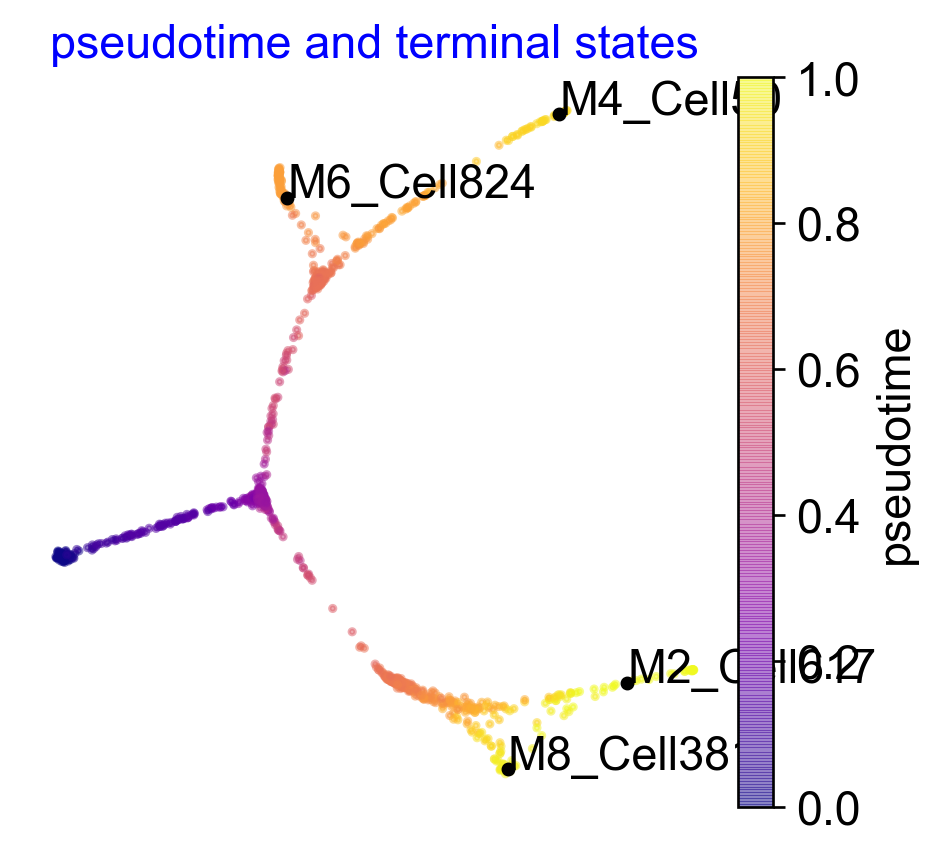

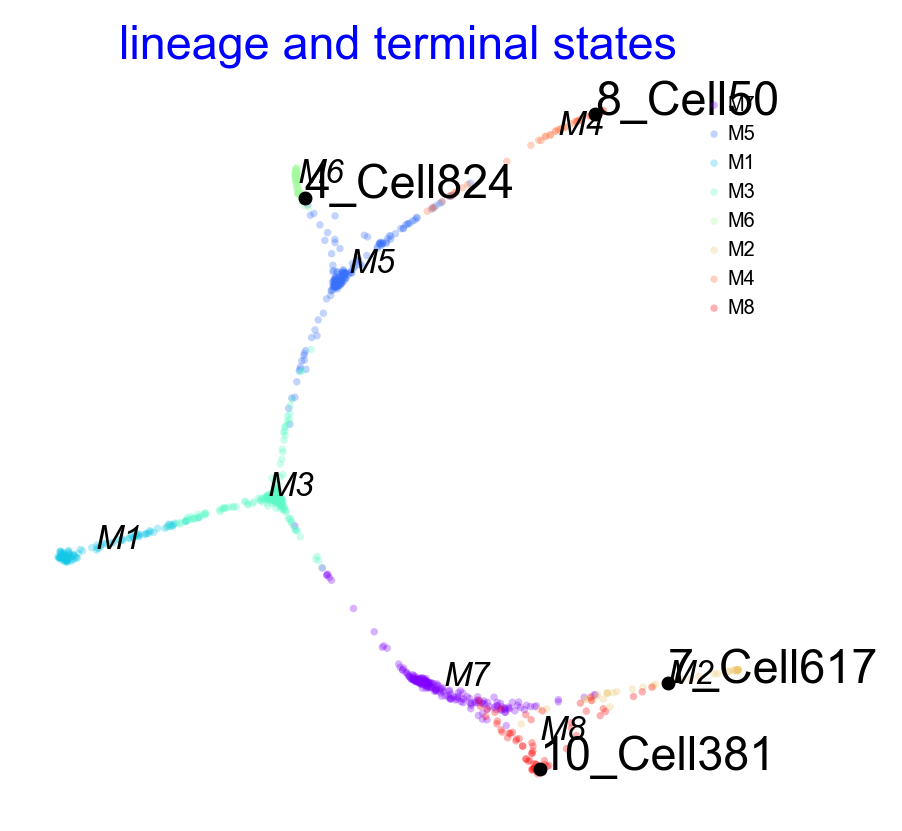

2023-01-05 11:39:16.675769	Time elapsed 5.4 seconds


In [5]:
#define parameters
ncomps, knn, random_seed, dataset, root_user  =30,20, 42,'toy', ['M1']

v0 = VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, jac_std_global=0.15, dist_std_local=1,
             knn=knn, cluster_graph_pruning_std=1, too_big_factor=0.3, root_user=root_user, preserve_disconnected=True, dataset='group',
             random_seed=random_seed, user_defined_terminal_group=['M6','M8','M2','M4'], do_compute_embedding = True, embedding_type = 'via-mds')
v0.run_VIA()
